In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [3]:
response=pd.read_table("multipleChoiceResponses.csv",sep=",")
print response.shape
print response.info()

(16716, 228)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB
None


In [4]:
print "min age of employee : ", response.Age.min()
print "max age of employee : ", response.Age.max()
print "meane age of employee : ", response.Age.mean()

min age of employee :  0.0
max age of employee :  100.0
meane age of employee :  32.3728410131


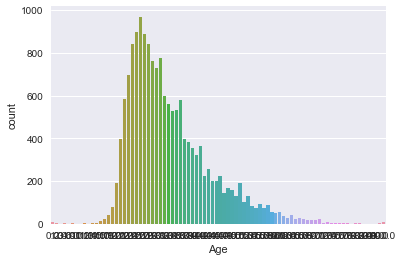

In [167]:
sns.countplot(data=response, x="Age")

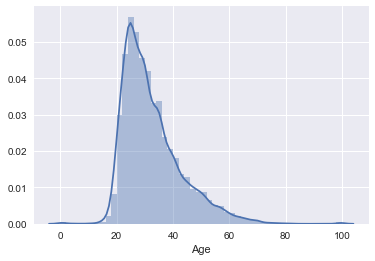

In [6]:
sns.distplot(response.Age.dropna(), bins=50)

In [7]:
response.GenderSelect.value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

In [8]:
print "Total no of reposndents : ", response.shape[0]
print "Total counry used in survey ", response.Country.nunique()
print " Max responce from the country", response.Country.value_counts().index[0],"With respondent : ", response.Country.value_counts().values[0]
print "Missing Gender info : ",response.GenderSelect.isnull().sum()

Total no of reposndents :  16716
Total counry used in survey  52
 Max responce from the country United States With respondent :  4197
Missing Gender info :  95


In [9]:
response.Country.value_counts().values[0]

4197

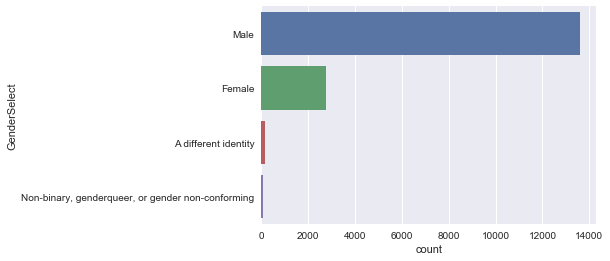

In [10]:
sns.countplot(data=response, y="GenderSelect", order=response.GenderSelect.value_counts().index)

### Respondents By Country

In [29]:
resp_con=response.Country.value_counts()[:15].to_frame()
resp_con

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


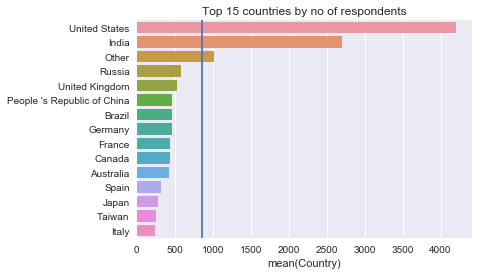

In [30]:
sns.barplot(resp_con.Country,resp_con.Country.index)
plt.title("Top 15 countries by no of respondents")
plt.axvline(resp_con.values.mean())

USA and India, constitute maximum respondents, about 1/3 of the total. Similarly Chile has the lowest number of respondents. Is this graph sufficient enough to say that majority of Kaggle Users are from India and USA. I don't think so, as the total users on Kaggle are more than 1 million while the number of respondents are only 16k.

In [31]:
response.Country.value_counts()

United States                  4197
India                          2704
Other                          1023
Russia                          578
United Kingdom                  535
People 's Republic of China     471
Brazil                          465
Germany                         460
France                          442
Canada                          440
Australia                       421
Spain                           320
Japan                           277
Taiwan                          254
Italy                           238
Netherlands                     205
Ukraine                         196
South Korea                     194
Singapore                       184
Poland                          184
Pakistan                        161
Turkey                          144
Indonesia                       131
Switzerland                     129
South Africa                    127
Mexico                          126
Colombia                        113
Iran                        

### Compensation
Data Scientists are one of the most highest payed indviduals. Lets check what the surveyors say..

In [32]:
response.CompensationAmount=response.CompensationAmount.replace(",","")
response.CompensationAmount=response.CompensationAmount.replace(".","")

In [33]:
rates=pd.read_table("conversionRates.csv",sep=",")
rates.head()
print rates.shape
print rates.info()

(86, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
Unnamed: 0       86 non-null int64
originCountry    86 non-null object
exchangeRate     86 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB
None


In [34]:
rates.drop("Unnamed: 0",axis=1,inplace=True)
print rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
originCountry    86 non-null object
exchangeRate     86 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB
None


In [35]:
salary=response[["CompensationAmount","CompensationCurrency","GenderSelect","Country","CurrentJobTitleSelect"]].dropna()

In [36]:
salary=salary.merge(rates,left_on="CompensationCurrency",right_on="originCountry", how="left")

In [37]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,"250,000",USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,"95,000",INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304
5,20000,USD,Male,United States,Researcher,USD,1.000000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342


In [38]:
salary.CompensationAmount=salary.CompensationAmount.str.replace(",","")
salary.CompensationAmount=salary.CompensationAmount.str.replace("-","")

In [39]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304
5,20000,USD,Male,United States,Researcher,USD,1.000000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342


In [40]:
salary.CompensationAmount=pd.to_numeric(salary["CompensationAmount"])

In [41]:
salary["salary"]=pd.to_numeric(salary.CompensationAmount)*salary.exchangeRate

In [42]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,salary
0,250000.0,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0000
1,80000.0,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8000
2,1200000.0,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4000
3,95000.0,INR,Male,India,Data Scientist,INR,0.015620,1483.9000
4,1100000.0,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4000
5,20000.0,USD,Male,United States,Researcher,USD,1.000000,20000.0000
6,100000.0,USD,Male,United States,Scientist/Researcher,USD,1.000000,100000.0000
7,20000.0,CZK,Male,Czech Republic,Other,CZK,0.045820,916.4000
8,624000.0,RUB,Male,Russia,Data Analyst,RUB,0.017402,10858.8480
9,156000000.0,COP,Male,Colombia,Data Scientist,COP,0.000342,53352.0000


In [43]:
print "max salary : ", salary.salary.max(), "USD"
print "min salary : ", salary.salary.min(), "USD"
print "average salary : ", salary.salary.mean(), "USD"
print "Median salary : ", salary.salary.median(), "USD"

max salary :  28297400000.0 USD
min salary :  0.0 USD
average salary :  6606008.74318 USD
Median salary :  53812.17 USD


Look at that humungous Salary!! Thats even larger than GDP of many countries. Another example of bogus response. The minimum salary maybe a case of a student. The median salary shows that Data Scientist enjoy good salary benefits.

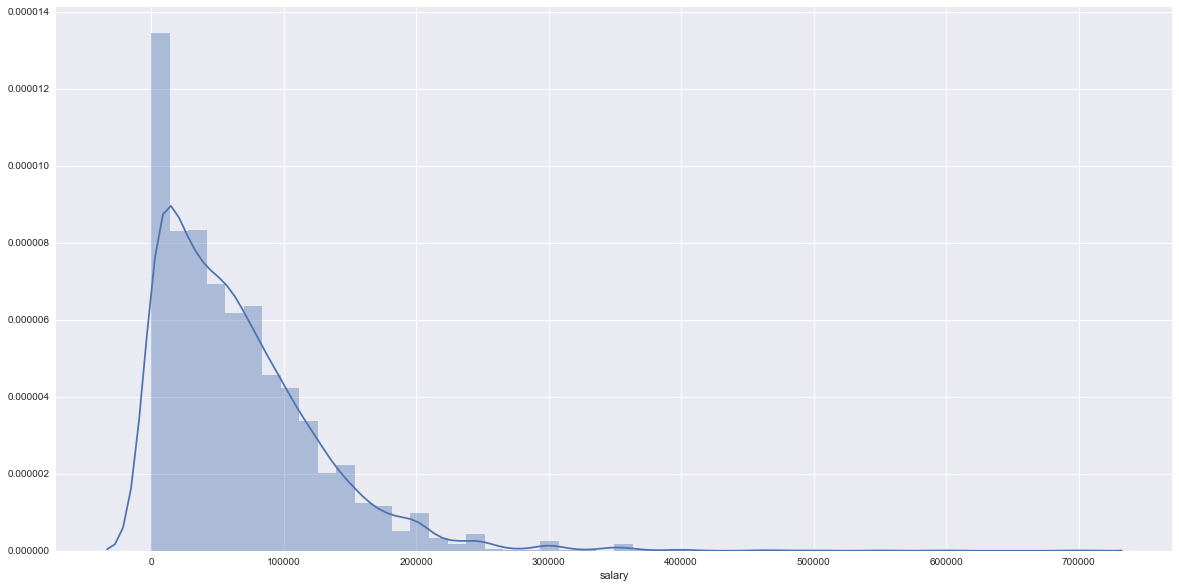

In [44]:
salary=salary[salary.salary<1000000]
f,ax=plt.subplots(1,1,figsize=(20,10))
sns.distplot(salary.salary)


### Compensation by Country

In [45]:
print "Total missing country : ", response.Country.isnull().sum()
print "Total country covered : ", response.Country.nunique()
print "Max response from ", response.Country.value_counts().index[0], "and with responds ",response.Country.value_counts().values[0]

Total missing country :  121
Total country covered :  52
Max response from  United States and with responds  4197


In [46]:
print "Total missing country : ", salary.Country.isnull().sum()
print "Total country covered : ", salary.Country.nunique()
print "Max response from ", salary.Country.value_counts().index[0], "and with responds ",salary.Country.value_counts().values[0]

Total missing country :  0
Total country covered :  52
Max response from  United States and with responds  1217


In [47]:
salary.Country.value_counts()

United States                  1217
India                           497
Other                           226
United Kingdom                  165
Russia                          156
Germany                         147
France                          143
Brazil                          137
Canada                          118
Spain                           111
Australia                       110
Japan                            81
People 's Republic of China      76
Italy                            75
Netherlands                      73
Taiwan                           57
Poland                           54
Mexico                           51
Singapore                        49
South Africa                     49
Ukraine                          45
Switzerland                      45
Colombia                         44
Pakistan                         35
Belgium                          33
Turkey                           31
Israel                           30
Finland                     

In [48]:
sal_count=salary.groupby("Country")["salary"].median().sort_values(ascending=False)[:15].to_frame()
sal_count.head()

,salary
Country,
United States,107000.000
Switzerland,104338.200
Australia,93469.115
Norway,87875.400
Denmark,80365.000


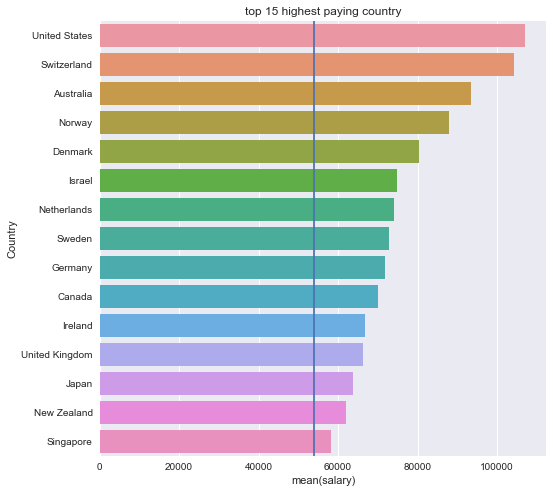

In [49]:
f,ax=plt.subplots(1,1,figsize=(8,8))
sns.barplot("salary",sal_count.index,data=sal_count)
plt.axvline(salary.salary.median())
plt.title("top 15 highest paying country")


In [50]:
con_top=salary.Country.value_counts()[:15]
con_top.index

Index([u'United States', u'India', u'Other', u'United Kingdom', u'Russia',
       u'Germany', u'France', u'Brazil', u'Canada', u'Spain', u'Australia',
       u'Japan', u'People 's Republic of China', u'Italy', u'Netherlands'],
      dtype='object')

In [51]:
df1=salary.groupby("Country").salary.median()

In [52]:
resp_con=salary.Country.value_counts()[:15].to_frame()
resp_con.columns
resp_con.head()
resp_con.index

Index([u'United States', u'India', u'Other', u'United Kingdom', u'Russia',
       u'Germany', u'France', u'Brazil', u'Canada', u'Spain', u'Australia',
       u'Japan', u'People 's Republic of China', u'Italy', u'Netherlands'],
      dtype='object')

In [53]:
df2=df1[df1.index.isin(resp_con.index)].sort_values(ascending=False).to_frame()
df2.head()

,salary
Country,
United States,107000.000
Australia,93469.115
Netherlands,74141.212
Germany,71749.560
Canada,70013.480


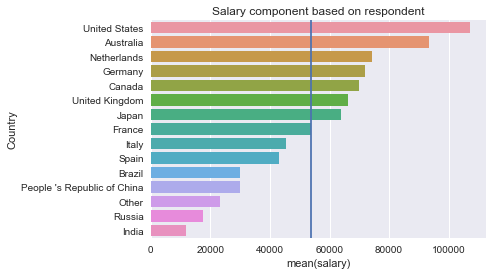

In [54]:
sns.barplot(df2.salary, df2.index)
plt.axvline(salary.salary.median())
plt.title("Salary component based on respondent")

The left graph shows the Top 15 high median salary paying countries. It is good to see that these countries provide salary more than the median salary of the complete dataset. Similarly,the right graph shows median salary of the Top 15 Countries by respondents. The most shocking graph is for India. India has the 2nd highest respondents, but still it has the lowest median salary in the graph. Individuals in USA have a salary almost 10 times more than their counterparts in India. What may be the reason?? Are IT professionals in India really underpaid?? We will check that later.

### Salary by Gender

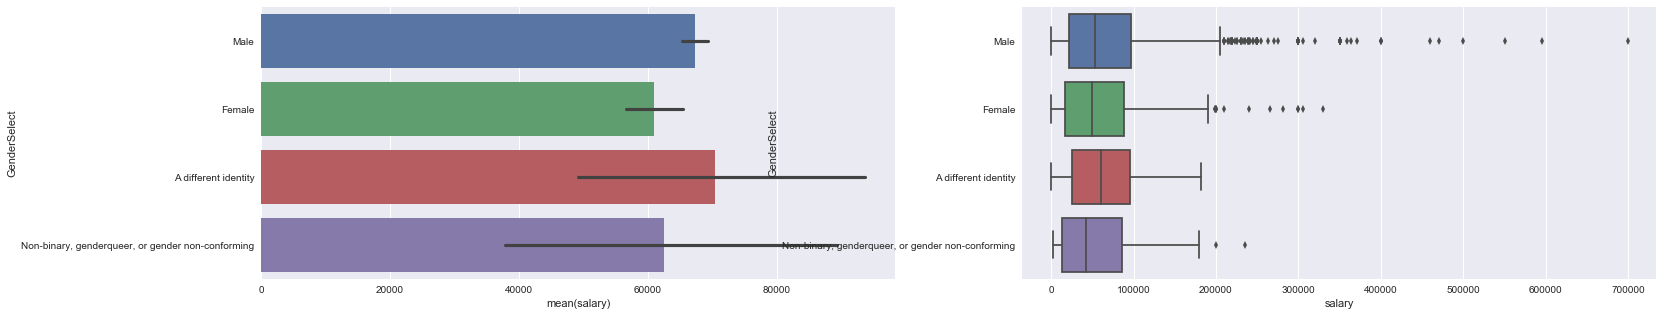

In [55]:
f,ax=plt.subplots(1,2,figsize=(25,5))
sns.barplot(salary.salary, salary.GenderSelect, ax=ax[0])
sns.boxplot(salary.salary, salary.GenderSelect, ax=ax[1])


The salary for males look to be high as compared to others.
### Age

In [56]:
response.Age.isnull().sum()

331

In [57]:
print "min age of employee : ", response.Age.min()
print "max age of employee : ", response.Age.max()
print "meane age of employee : ", response.Age.mean()
print "Missing age", response.Age.isnull().sum() , "With total ", response.Age.isnull().count()

min age of employee :  0.0
max age of employee :  100.0
meane age of employee :  32.3728410131
Missing age 331 With total  16716


([<matplotlib.axis.XTick at 0xe78e518>,
 <a list of 18 Text xticklabel objects>)

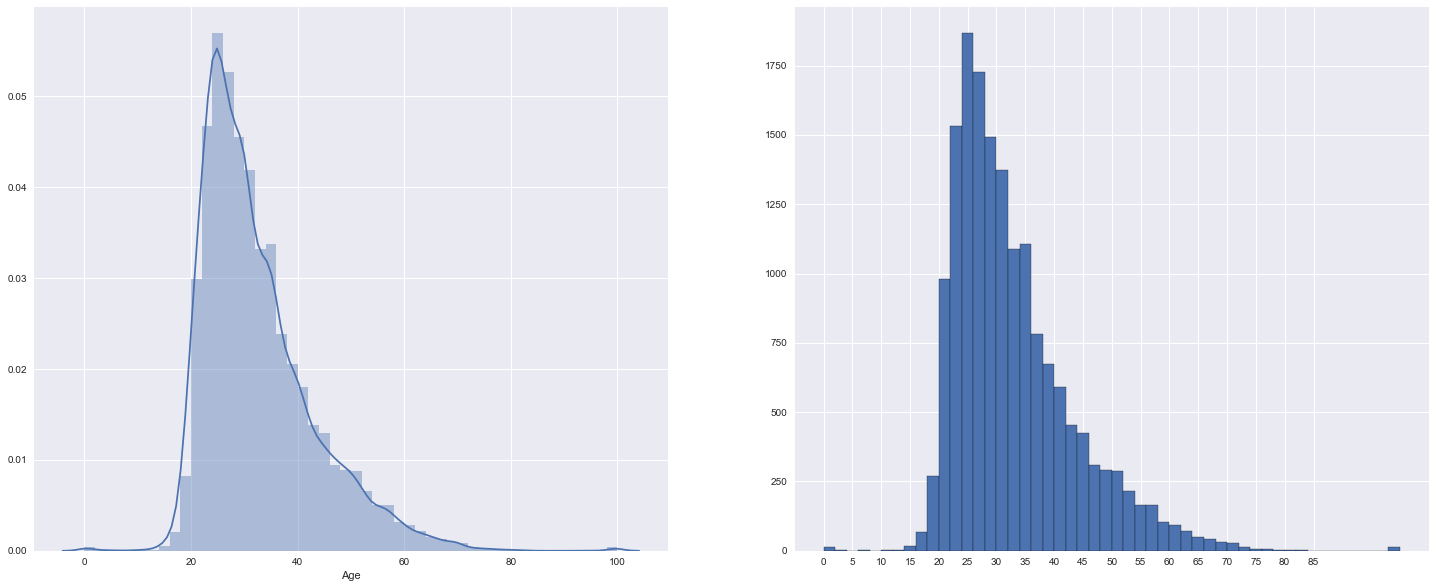

In [58]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.distplot(response.Age.dropna(), bins=50, ax=ax[0])
response.Age.hist( bins=50,edgecolor="black", ax=ax[1])
plt.xticks(range(0,90,5))

The respondents are young people with majority of them being in the age bracket if 25-35.

### Profession & Major

In [59]:
response.groupby("CurrentEmployerType")

In [60]:
response.CurrentEmployerType.value_counts()

Employed by professional services/consulting firm                                                                                                                                                                                                                                                                                        2383
Employed by a company that performs advanced analytics                                                                                                                                                                                                                                                                                   2240
Employed by a company that doesn't perform advanced analytics                                                                                                                                                                                                                                                                            197

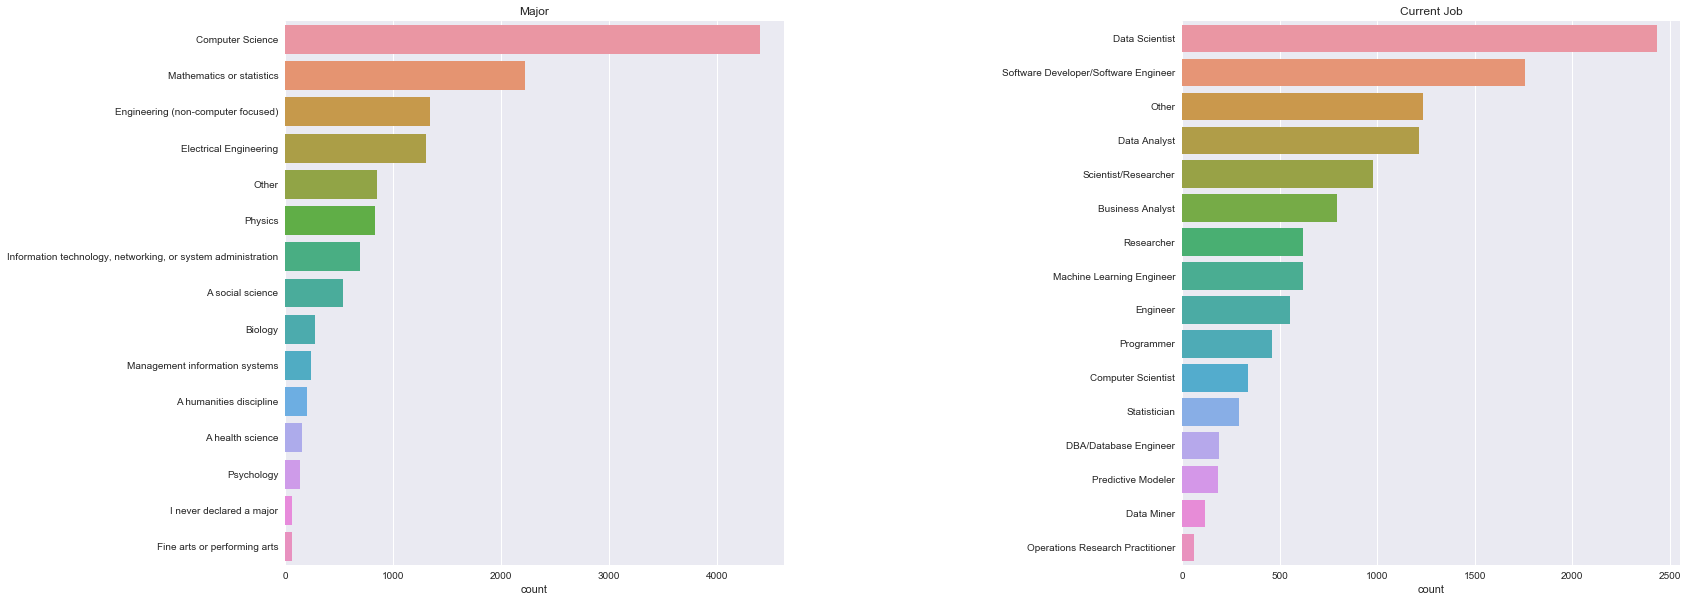

In [61]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=response['MajorSelect'],ax=ax[0],order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')
sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

Data Science and Machine Learning is used in almost every industry. This is evident from the left graph,as people from different areas of interest like Physics, Biology, etc are taking it up for better understanding of the data. The right side graph shows the Current Job of the respondents. A major portion of the respondents are Dats Scientists. But as it is survey data, we know that there may be many ambigious responses. Later on we will check are these respondents real datas-scientists or self proclaimed data-scientists.

### Compensation By Job Title

In [62]:
salary.groupby("CurrentJobTitleSelect").salary.median().sort_values(ascending=False).to_frame()

,salary
CurrentJobTitleSelect,
Operations Research Practitioner,94421.2800
Predictive Modeler,71555.0000
Data Scientist,70644.7275
Other,70013.4800
Software Developer/Software Engineer,54000.0000
DBA/Database Engineer,53812.1700
Engineer,52018.4310
Scientist/Researcher,47500.0000
Statistician,46201.2000


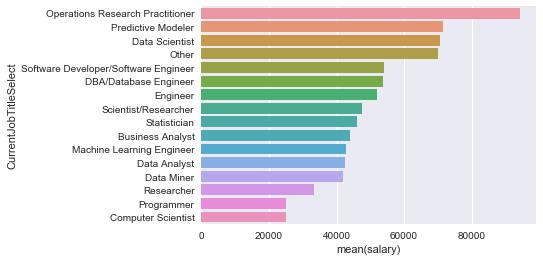

In [63]:
sal_job=salary.groupby("CurrentJobTitleSelect").salary.median().sort_values(ascending=False).to_frame()
sns.barplot(sal_job.salary, sal_job.index)

Operations Research Practitioner has the highest median salary followed by Predictive Modeler and Data Scientist. Computer Scientist and Programmers have the lowest compensation.

### Machine Learning

In [64]:
response.MLSkillsSelect.unique()

array([ 'Computer Vision,Natural Language Processing,Supervised Machine Learning (Tabular Data),Time Series',
       'Computer Vision,Supervised Machine Learning (Tabular Data),Unsupervised Learning',
       'Adversarial Learning,Computer Vision,Natural Language Processing',
       ...,
       'Adversarial Learning,Outlier detection (e.g. Fraud detection),Recommendation Engines,Time Series',
       'Natural Language Processing,Outlier detection (e.g. Fraud detection),Speech Recognition',
       'Adversarial Learning,Speech Recognition,Supervised Machine Learning (Tabular Data),Time Series,Unsupervised Learning'], dtype=object)

In [65]:
skills=response.MLSkillsSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
skills_set

['Computer Vision',
 'Natural Language Processing',
 'Supervised Machine Learning (Tabular Data)',
 'Time Series',
 'Computer Vision',
 'Supervised Machine Learning (Tabular Data)',
 'Unsupervised Learning',
 'Adversarial Learning',
 'Computer Vision',
 'Natural Language Processing',
 'Recommendation Engines',
 'Reinforcement learning',
 'Supervised Machine Learning (Tabular Data)',
 'Survival Analysis',
 'Time Series',
 'Unsupervised Learning',
 'Computer Vision',
 'Outlier detection (e.g. Fraud detection)',
 'Recommendation Engines',
 'Supervised Machine Learning (Tabular Data)',
 'Time Series',
 'Unsupervised Learning',
 'Natural Language Processing',
 'Supervised Machine Learning (Tabular Data)',
 'Unsupervised Learning',
 'Natural Language Processing',
 'Supervised Machine Learning (Tabular Data)',
 'Supervised Machine Learning (Tabular Data)',
 'Supervised Machine Learning (Tabular Data)',
 'Time Series',
 'Unsupervised Learning',
 'Computer Vision',
 'Outlier detection (e.g. Fra

In [66]:
pd.Series(skills_set).value_counts().to_frame()

,0
Supervised Machine Learning (Tabular Data),8188
Unsupervised Learning,4389
Time Series,4250
Natural Language Processing,3163
Outlier detection (e.g. Fraud detection),2621
Computer Vision,2564
Recommendation Engines,2305
Survival Analysis,1313
Reinforcement learning,1074
Other (please specify; separate by semi-colon),782


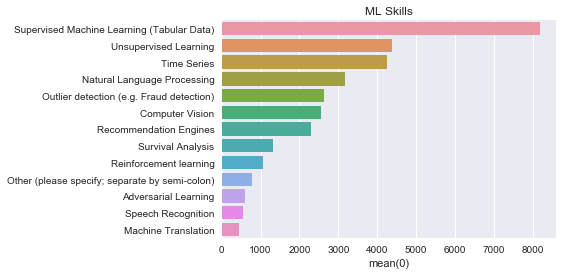

In [67]:
plt1=pd.Series(skills_set).value_counts().to_frame()
sns.barplot(x=plt1[0], y=plt1.index)
plt.title("ML Skills")

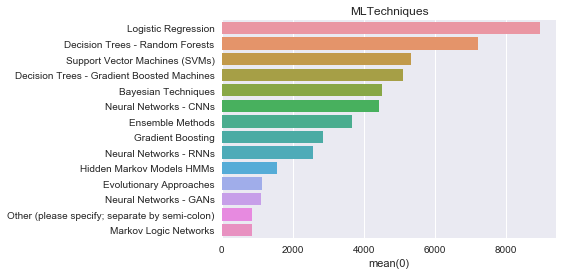

In [68]:
skills=response.MLTechniquesSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt2=pd.Series(skills_set).value_counts().to_frame()
sns.barplot(x=plt2[0], y=plt2.index)
plt.title("MLTechniques")

It is evident that most of the respondents are working with Supervised Learning, and Logistic Regression being the favorite among them. There is no algorithm that is the best for all classification domains. A way to select one algorithm for a particular domain is by means of crossvalidation on the training data.

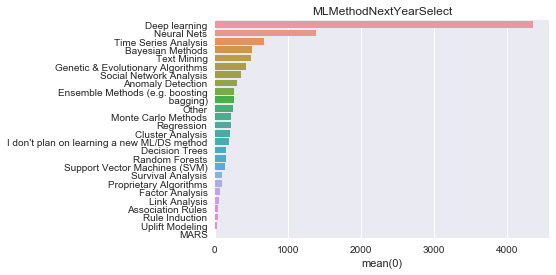

In [69]:
skills=response.MLMethodNextYearSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt3=pd.Series(skills_set).value_counts().to_frame()
sns.barplot(x=plt3[0], y=plt3.index)
plt.title("MLMethodNextYearSelect")

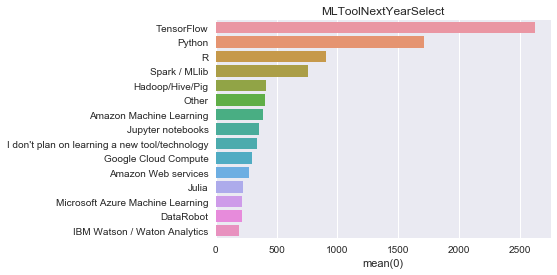

In [70]:
skills=response.MLToolNextYearSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt4=pd.Series(skills_set).value_counts()[:15].to_frame()
sns.barplot(x=plt4[0], y=plt4.index)
plt.title("MLToolNextYearSelect")

It is evident that the next year is going to see a jump in number of Deep Learning practitioners. Deep Learning and neural nets or in short AI is a favorite hot-topic for the next Year. Also in terms of Tools, Python is preferred more over R. Big Data Tools like Spark and Hadoop also have a good share in the coming years.

### Best Platforms to Learn

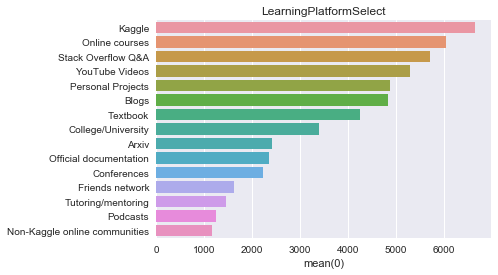

In [71]:
skills=response.LearningPlatformSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt5=pd.Series(skills_set).value_counts()[:15].to_frame()
sns.barplot(x=plt5[0], y=plt5.index)
plt.title("LearningPlatformSelect")

My personal favorite Kaggle, is the most sought after source for learning Data Science, as it has notebooks from really experienced Data Scientists. The next choice is Online Courses i.e MOOC's. Platforms like coursera,udacity provide interactive videos and exercises for learning. Similary Youtube channels like Siraj Raval and others offer a free medium to study. These all medium are above than Textbooks. The reason maybe that textbooks often have limited content, or people are more fond of watching videos and learning.

### Hardware Used

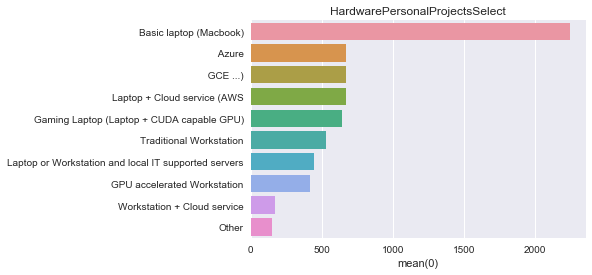

In [72]:
skills=response.HardwarePersonalProjectsSelect.str.split(",")
skills_set=[]
for i in skills.dropna():
    skills_set.extend(i)
plt5=pd.Series(skills_set).value_counts()[:15].to_frame()
sns.barplot(x=plt5[0], y=plt5.index)
plt.title("HardwarePersonalProjectsSelect")

Since majority of the respondents fall in the age category below 25, which is where a majority of students fall under, thus a basic Laptop is the most commonly used machine for work.

### Where Do I get Datasets From??

In [73]:
response.PublicDatasetsSelect.head()

0    Dataset aggregator/platform (i.e. Socrata/Kagg...
1    Dataset aggregator/platform (i.e. Socrata/Kagg...
2    Dataset aggregator/platform (i.e. Socrata/Kagg...
3            I collect my own data (e.g. web-scraping)
4                                               GitHub
Name: PublicDatasetsSelect, dtype: object

In [74]:
response.PublicDatasetsSelect.value_counts()

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)                                                                                                                                    2950
Google Search                                                                                                                                                                                                 1052
I collect my own data (e.g. web-scraping)                                                                                                                                                                      564
University/Non-profit research group websites                                                                                                                                                                  558
GitHub                                                                                                                                                      

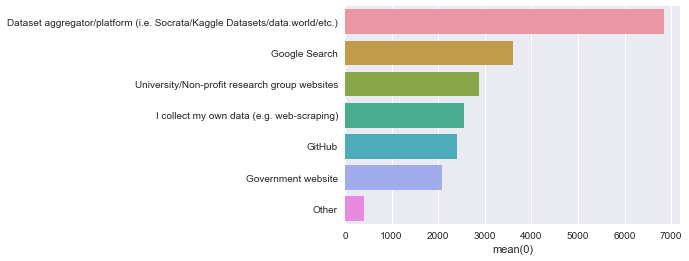

In [75]:
data=response.PublicDatasetsSelect.str.split(",")
data_set=[]
for i in data.dropna():
    data_set.extend(i)
data_set1=pd.Series(data_set).value_counts().to_frame()

sns.barplot(data_set1[0],data_set1.index)


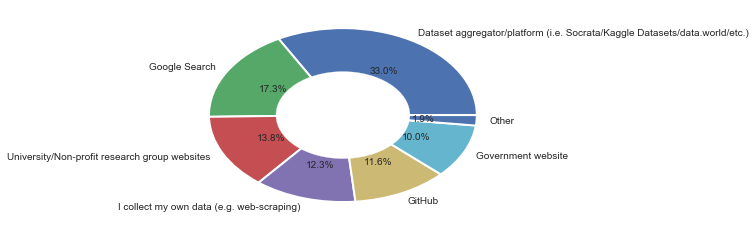

In [76]:
data_set1[0].plot.pie(autopct="%1.1f%%",wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.5,color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

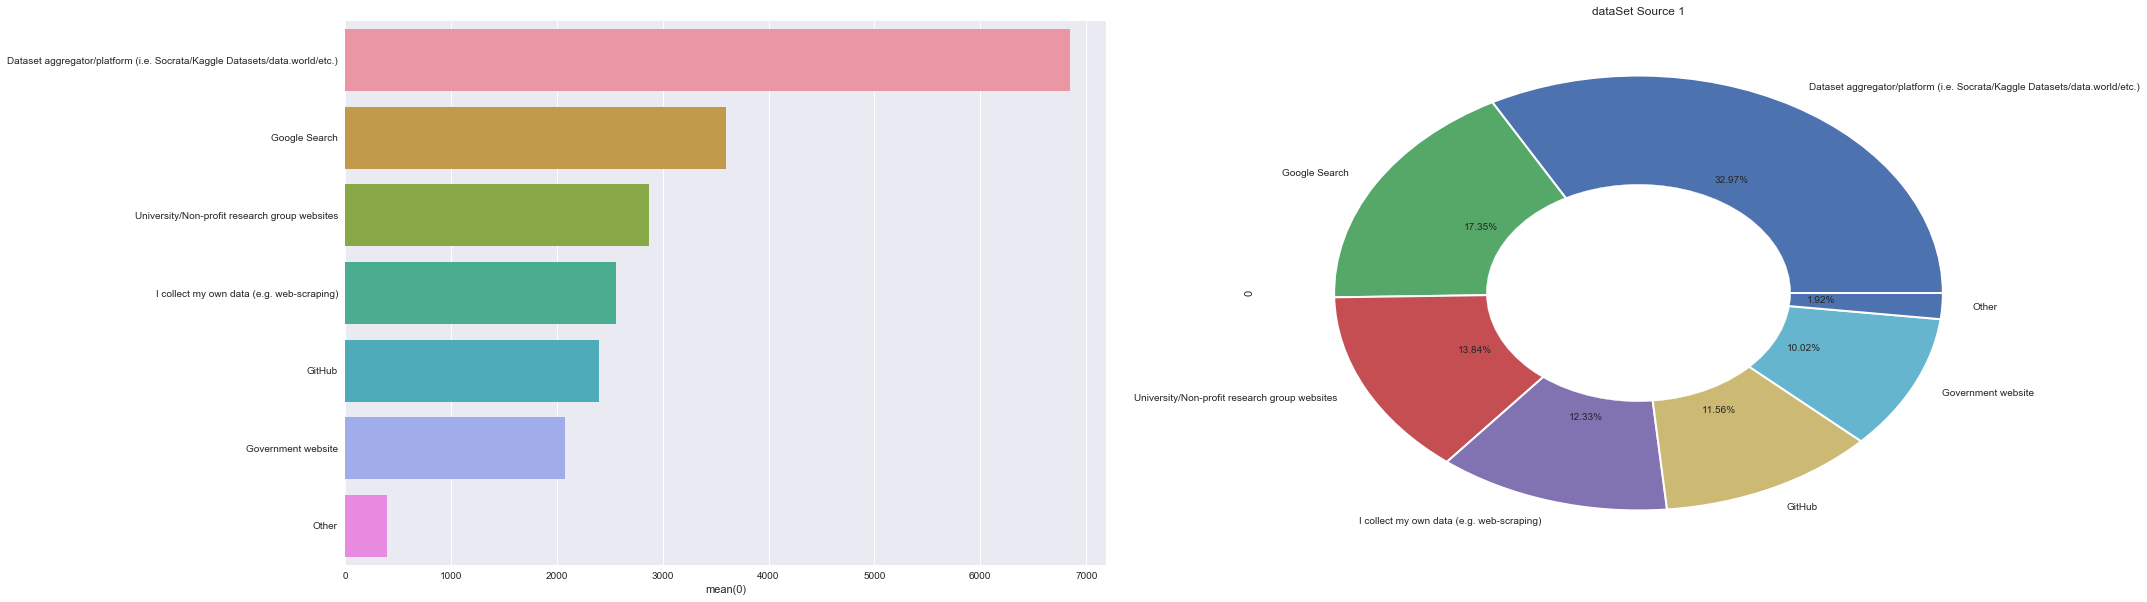

In [77]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.barplot(data_set1[0],data_set1.index,ax=ax[0])
plt.title("dataSet Source")

data_set1[0].plot.pie(autopct="%.2f%%", ax=ax[1],wedgeprops={'linewidth' : 2, 'edgecolor': 'white'})
my_circle1=plt.Circle((0,0),.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle1)
plt.title("dataSet Source 1")


With hundreds of Dataset available, Kaggle is the most sought after source for datasets.

### Code Sharing

In [78]:
code=response.WorkCodeSharing.dropna().str.split(",")
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().sort_values(ascending=False).to_frame()

    

,0
Git,3620
Generic non-cloud file sharing software (Email/Shared Server/etc.),1727
Generic cloud file sharing software (Dropbox/Box/etc.),1230
Bitbucket,1117
Subversion,618
Other,568
Mercurial,100


In [79]:
code=response.WorkCodeSharing.dropna().str.split(",")
code_share=[]
for i in code.dropna():
    code_share.extend(i)
code_1=pd.Series(code_share).value_counts().sort_values(ascending=False).to_frame()
code_1

    

,0
Git,3620
Generic non-cloud file sharing software (Email/Shared Server/etc.),1727
Generic cloud file sharing software (Dropbox/Box/etc.),1230
Bitbucket,1117
Subversion,618
Other,568
Mercurial,100


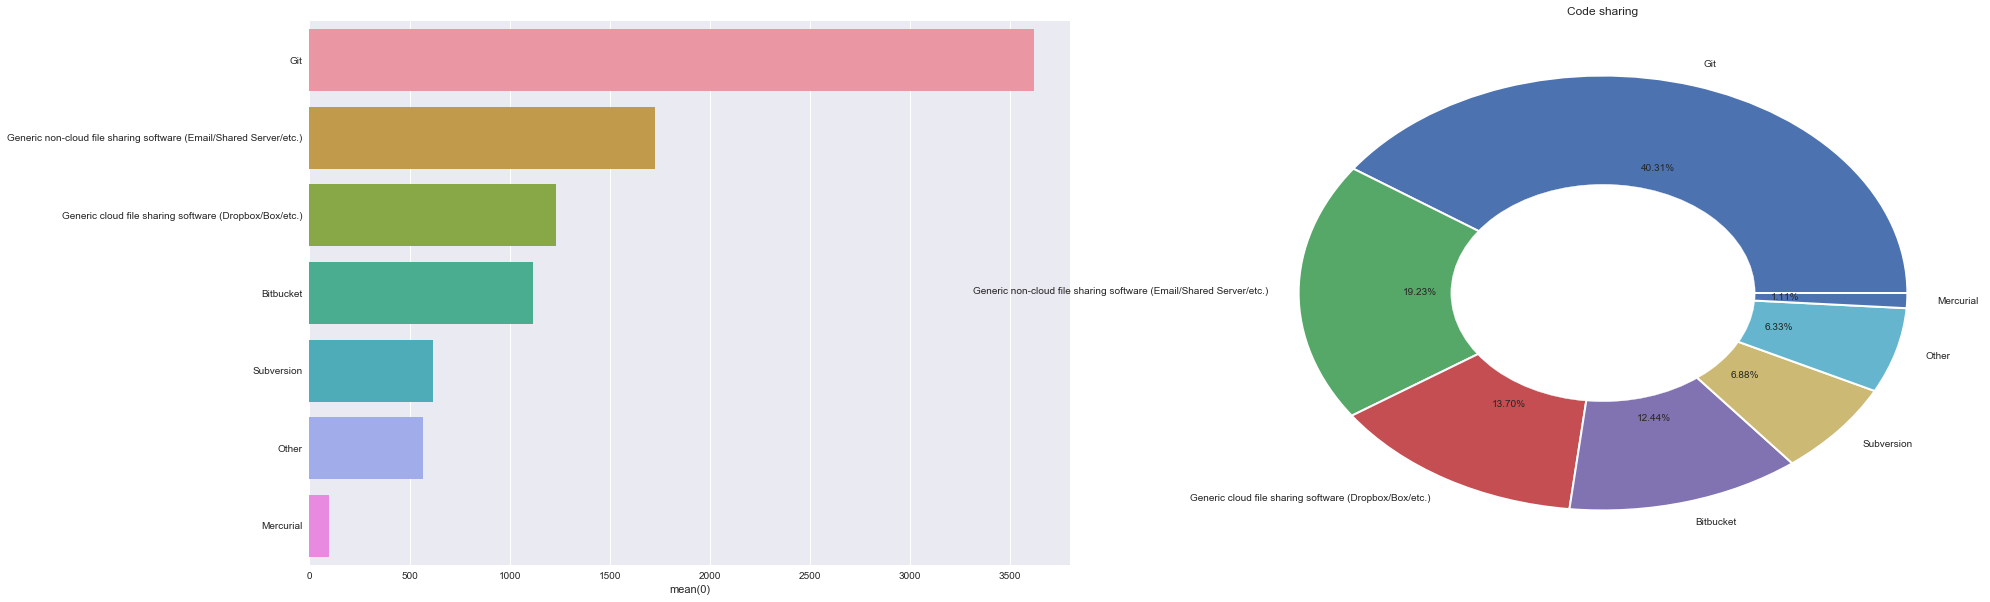

In [80]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.barplot(code_1[0], code_1.index,ax=ax[0])
plt.title("Code sharing")

code_1[0].plot.pie(autopct="%.2f%%", ax=ax[1],wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'})
circle_code=plt.Circle((0,0),.5, color='white')

p=plt.gcf()
p.gca().add_artist(circle_code)
plt.ylabel("")



Github is the most used platform for Code and project sharing. The advantages of using github are:

1)Version control your projects.

2)Explore other’s projects on GitHub, get inspired code more, or contribute to their project.

3)Collaborate with others, by letting other people contribute to your projects or you contributing to other’s projects, and many more.

### Challenges in Data Science

In [81]:
challange=response.WorkChallengesSelect.dropna().str.split(",")
c1=[]
for i in challange.dropna():
    c1.extend(i)
c2=pd.Series(c1).value_counts().sort_values(ascending=False).to_frame()
c2.head()

,0
Dirty data,3641
Lack of data science talent in the organization,3067
Company politics / Lack of management/financial support for a data science team,2746
The lack of a clear question to be answering or a clear direction to go in with the available data,2242
Unavailability of/difficult access to data,2230


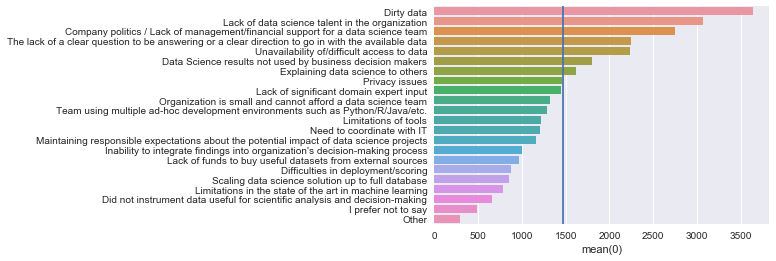

In [82]:
sns.barplot(c2[0], c2.index)
plt.axvline(c2[0].mean())


The main challenge in Data Science is getting the proper Data. The graph clearly shows that dirty data is the bigget challenge. Now what is dirty data?? Dirty data is a database record that contains errors. Dirty data can be caused by a number of factors including duplicate records, incomplete or outdated data, and the improper parsing of record fields from disparate systems. Luckily Kaggle datasets are pretty clean and standardised.

Some other major challenges are the Lack of Data Science and machine learning talent, difficulty in getting data and lack of tools. Thats why Data Science is the sexiest job in 21st century.With the increasing amount of data, this demand will substantially grow.

### Job Satisfaction

In [83]:
response.JobSatisfaction.dropna().value_counts()

7                          1448
8                          1427
6                           765
9                           677
5                           627
10 - Highly Satisfied       589
3                           358
4                           354
1 - Highly Dissatisfied     167
I prefer not to share       148
2                           117
Name: JobSatisfaction, dtype: int64

In [84]:
response.JobSatisfaction=response.JobSatisfaction.replace({"10 - Highly Satisfied" : "10", "1 - Highly Dissatisfied" : "1", "I prefer not to share" : "1"})

In [85]:
response.JobSatisfaction.dropna().value_counts()

7     1448
8     1427
6      765
9      677
5      627
10     589
3      358
4      354
1      315
2      117
Name: JobSatisfaction, dtype: int64

In [86]:
response.CurrentJobTitleSelect.value_counts()

Data Scientist                          2433
Software Developer/Software Engineer    1759
Other                                   1233
Data Analyst                            1213
Scientist/Researcher                     978
Business Analyst                         796
Researcher                               619
Machine Learning Engineer                617
Engineer                                 552
Programmer                               462
Computer Scientist                       335
Statistician                             289
DBA/Database Engineer                    187
Predictive Modeler                       181
Data Miner                               118
Operations Research Practitioner          58
Name: CurrentJobTitleSelect, dtype: int64

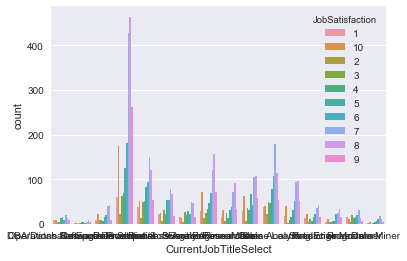

In [87]:
sns.countplot("CurrentJobTitleSelect", hue="JobSatisfaction", data=response)

In [88]:
satisfation=response[~response.JobSatisfaction.isnull()]
satisfation.JobSatisfaction=satisfation.JobSatisfaction.astype(int)

s1=satisfation.groupby(["CurrentJobTitleSelect"])["JobSatisfaction"].mean().sort_values(ascending=False).to_frame()
s1

,JobSatisfaction
CurrentJobTitleSelect,
Data Scientist,7.087168
Machine Learning Engineer,7.019608
Operations Research Practitioner,6.875000
Scientist/Researcher,6.864780
Predictive Modeler,6.846154
Researcher,6.694444
Statistician,6.636364
Other,6.626617
Computer Scientist,6.600000


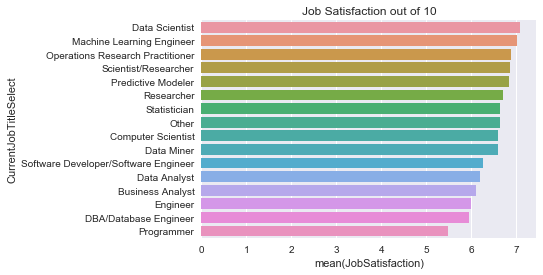

In [89]:
sns.barplot(s1.JobSatisfaction, s1.index)
plt.title("Job Satisfaction out of 10")

Data Scientists and Machine Learning engineers are the most satisfied people(who won't be happy with so much money), while Programmers have the lowest job satisfaction. But the thing to note here is that even if Computer Scientists have a lower salary than Programmers, still they have a good job satisfaction level than programmers. Thus Salary is not the only criteria or job satisfaction.

### Job Satisfication By Country

In [90]:
c1=satisfation.groupby(["Country"])["JobSatisfaction"].mean().sort_values(ascending=False).to_frame()
c1.head()

,JobSatisfaction
Country,
Sweden,7.974359
Israel,7.517857
Switzerland,7.323944
Chile,7.307692
Mexico,7.289855


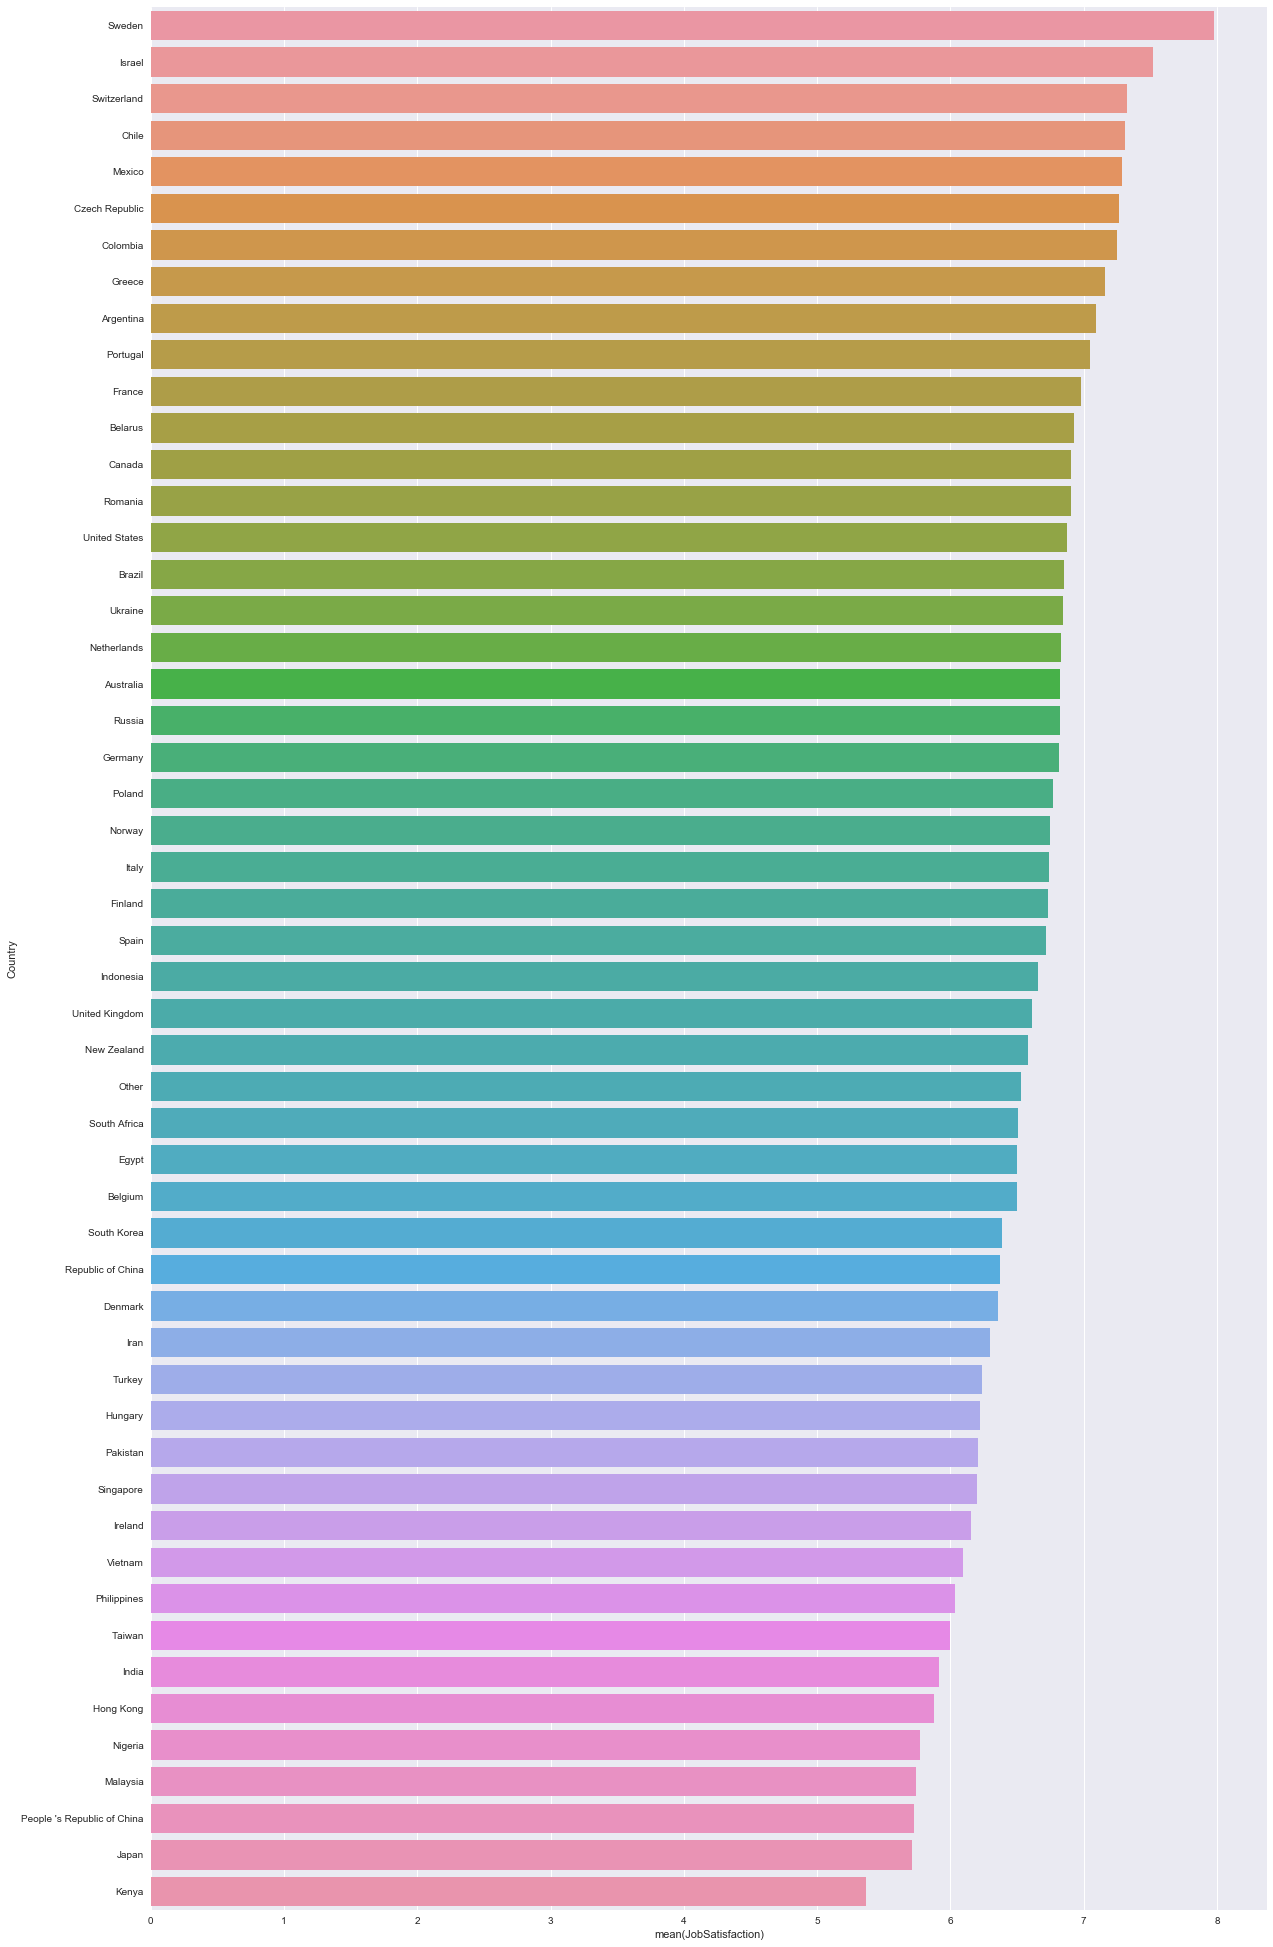

In [91]:
plt.figure(figsize=(20,35))
sns.barplot(c1.JobSatisfaction, c1.index)

The average Job Satisfaction level is between 6-7.5 for most of the countries. It is lower in Japan(where people work for about 14 hours) and China. It is higher in come countries like Sweden and Mexico.

### Python vs R or (Batman vs Superman)

Python and R are the most widely used Open-Source languages for Data Science and Machine-Learning stuff. For a budding data scientist or analyst, the biggest and trickiest doubt is: Which Language Should I Start With?? While both the languages have their own advantages and shortcomings, it depends on the individual's purpose while selecting a language of his/her choice. Both the languages cater the needs of different kinds of work. Python is a general purpose langauge, thus web and application integration is easier, while R is meant for pure statistical and analytics purpose. The area where R will completely beat Python is visualisations with the help of packages like ggplot2 and shiny. But Python has an upperhand in Machine Learning stuff. So lets see what the surveyers say..

In [92]:
resp=response[~response.WorkToolsSelect.isnull()]
resp=resp.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
Python=resp[(resp.WorkToolsSelect.str.contains('Python'))&(~resp.WorkToolsSelect.str.contains('R'))]
R=resp[~(resp.WorkToolsSelect.str.contains('Python'))&(resp.WorkToolsSelect.str.contains('R'))]
Both=resp[(resp.WorkToolsSelect.str.contains('Python'))&(resp.WorkToolsSelect.str.contains('R'))]

In [93]:
B1=Both[:10]
R1=R[:10]
P1=Python[:10]

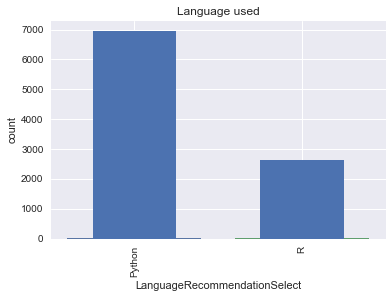

In [94]:
response.LanguageRecommendationSelect.value_counts()[:2]
sns.countplot(response.LanguageRecommendationSelect.value_counts()[:2])
response.LanguageRecommendationSelect.value_counts()[:2].plot.bar()
plt.title("Language used")

Clearly Python is the recommended language for begineers. The reason for this maybe due to its simple english-like syntax and general purpose functionality.

### Recommendation By Python and R users

In [95]:
print P1.LanguageRecommendationSelect.value_counts()
print R1.LanguageRecommendationSelect.value_counts()
print B1.LanguageRecommendationSelect.value_counts()

Python    8
Matlab    1
Name: LanguageRecommendationSelect, dtype: int64
R         4
Stata     2
Python    2
SAS       1
F#        1
Name: LanguageRecommendationSelect, dtype: int64
Python    9
R         1
Name: LanguageRecommendationSelect, dtype: int64


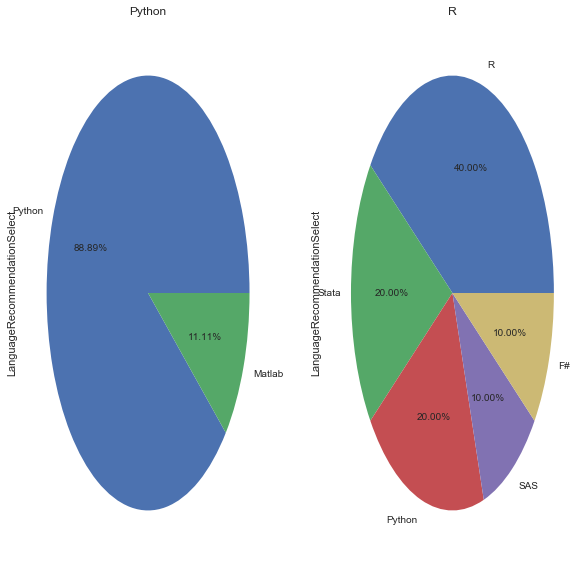

In [96]:
f,ax=plt.subplots(1,2,figsize=(10,10))
P1.LanguageRecommendationSelect.value_counts().plot.pie(autopct="%.2f%%",ax=ax[0])
ax[0].set_title("Python")
R1.LanguageRecommendationSelect.value_counts().plot.pie(autopct="%.2f%%",ax=ax[1])
ax[1].set_title("R")

This is a interesting find. About 91.6% Python users recommend Python as the first language for begineers, whereas only 67.2% R users recommend R as the first language. Also 20.6% R users recommend Python but only 1.68% Python users recommend R as the first language. One thing to note is that users of both recommend the same Languages i.e SQL, Matlab and C/C++. I have only considered the Top 5 recommended languages, so the percentage will change if we consider all of them. But the difference would be just 2-3%.

### Necessary or Not??

In [97]:
print response.JobSkillImportancePython.value_counts()
print response.JobSkillImportanceR.value_counts()



Necessary       2604
Nice to have    1319
Unnecessary      108
Name: JobSkillImportancePython, dtype: int64
Nice to have    2027
Necessary       1636
Unnecessary      281
Name: JobSkillImportanceR, dtype: int64


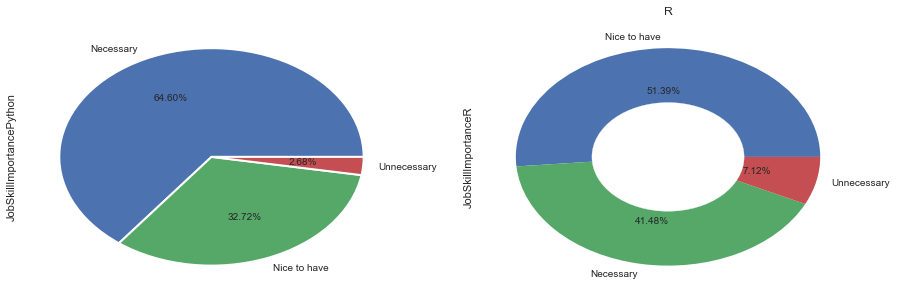

In [98]:
f,ax=plt.subplots(1,2,figsize=(15,5))
response.JobSkillImportancePython.value_counts().plot.pie(autopct="%.2f%%",ax=ax[0],wedgeprops={"linewidth":2, "edgecolor" : "white"})

response.JobSkillImportanceR.value_counts().plot.pie(autopct="%.2f%%",ax=ax[1])
ax[1].set_title("R")
circle_code=plt.Circle((0,0),.5,color="white")

p1=plt.gcf()
p1.gca().add_artist(circle_code)

Clearly Python is a much more necessary skill compared to R.
### Number Of Users By Language

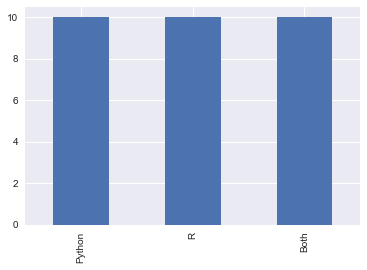

In [99]:
pd.Series([P1.shape[0],R1.shape[0],B1.shape[0]],index=["Python",'R',"Both"]).plot.bar()

In [100]:
print "No of python users" , P1.shape[0]
print "No of R users" , R1.shape[0]
print "No of Users having both " , B1.shape[0]

No of python users 10
No of R users 10
No of Users having both  10



### Compensation

In [101]:
P1.CompensationAmount=P1.CompensationAmount.str.replace(",","")
P1.CompensationAmount=P1.CompensationAmount.str.replace(".","")

B1.CompensationAmount=B1.CompensationAmount.str.replace(",","")
B1.CompensationAmount=B1.CompensationAmount.str.replace(".","")

In [102]:
py_sal=pd.to_numeric(P1.CompensationAmount.dropna())*P1.exchangeRate.dropna()
py_sal=py_sal[py_sal<1000000]
r_sal=pd.to_numeric(R1.CompensationAmount.dropna())*R1.exchangeRate.dropna()
r_sal=r_sal[r_sal<1000000]
b_sal=pd.to_numeric(B1.CompensationAmount.dropna())*B1.exchangeRate.dropna()
b_sal=b_sal[b_sal<1000000]

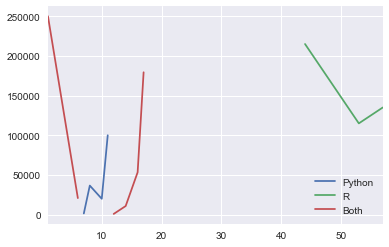

In [103]:
total_sal=pd.DataFrame([py_sal,r_sal,b_sal], index=["Python","R","Both"])
total_sal.T.plot()

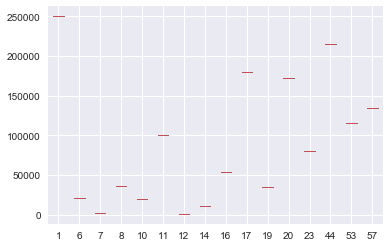

In [104]:
total_sal.plot.box()

Python coders have a slightly higher median salary as that compared to their R counterparts. However, the people who know both these languages, have a pretty high median salary as compared to both of them.

## Language Used By Professionals

In [105]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

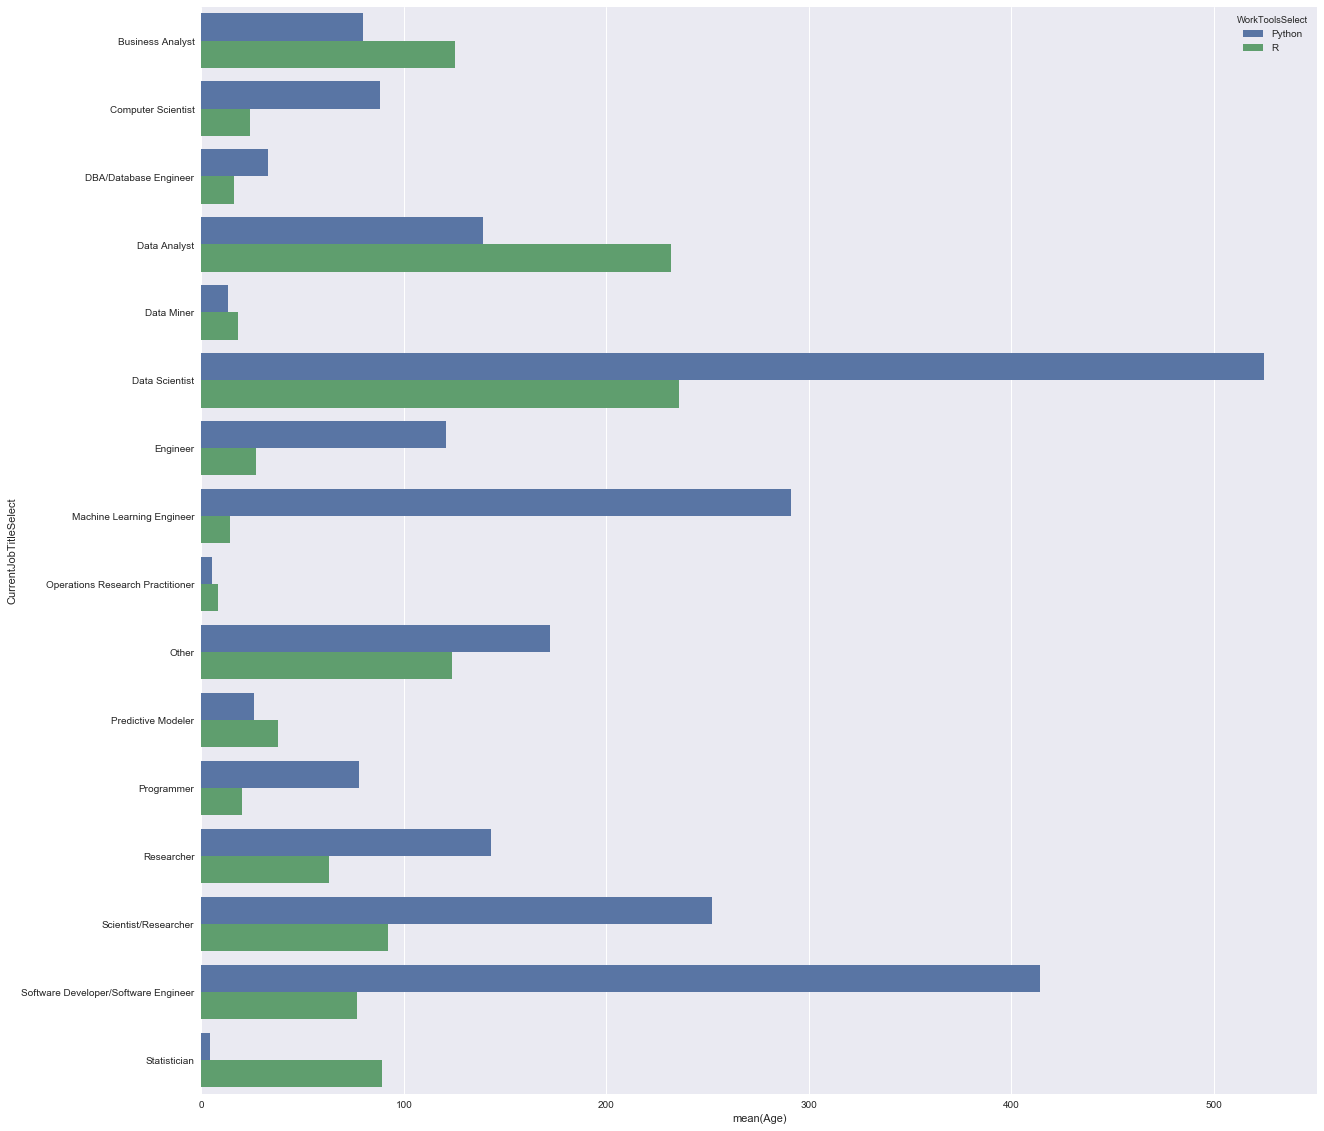

In [106]:
py1=python.copy()
r=R.copy()
py1.WorkToolsSelect="Python"
r.WorkToolsSelect="R"
r_vs_py=pd.concat([py1,r])
r_vs_py_1=r_vs_py.groupby(["WorkToolsSelect","CurrentJobTitleSelect"])["Age"].count().to_frame().reset_index()
r_vs_py_1
plt.figure(figsize=(20,20))
sns.barplot("Age", "CurrentJobTitleSelect", hue="WorkToolsSelect", data=r_vs_py_1)


As I had mentioned earlier, R beats Python in visuals. Thus people with Job-Titles like Data Analyst, Business Analyst where graphs and visuals play a very prominent role, prefer R over Python. Similarly almost 90% of statisticians use R. Also as stated earlier, Python is better in Machine Learning stuff, thus Machine Learning engineers, Data Scientists and others like DBA or Programmers prefer Python over R.

Thus for data visuals--->R else---->Python.

### Job Function vs Language

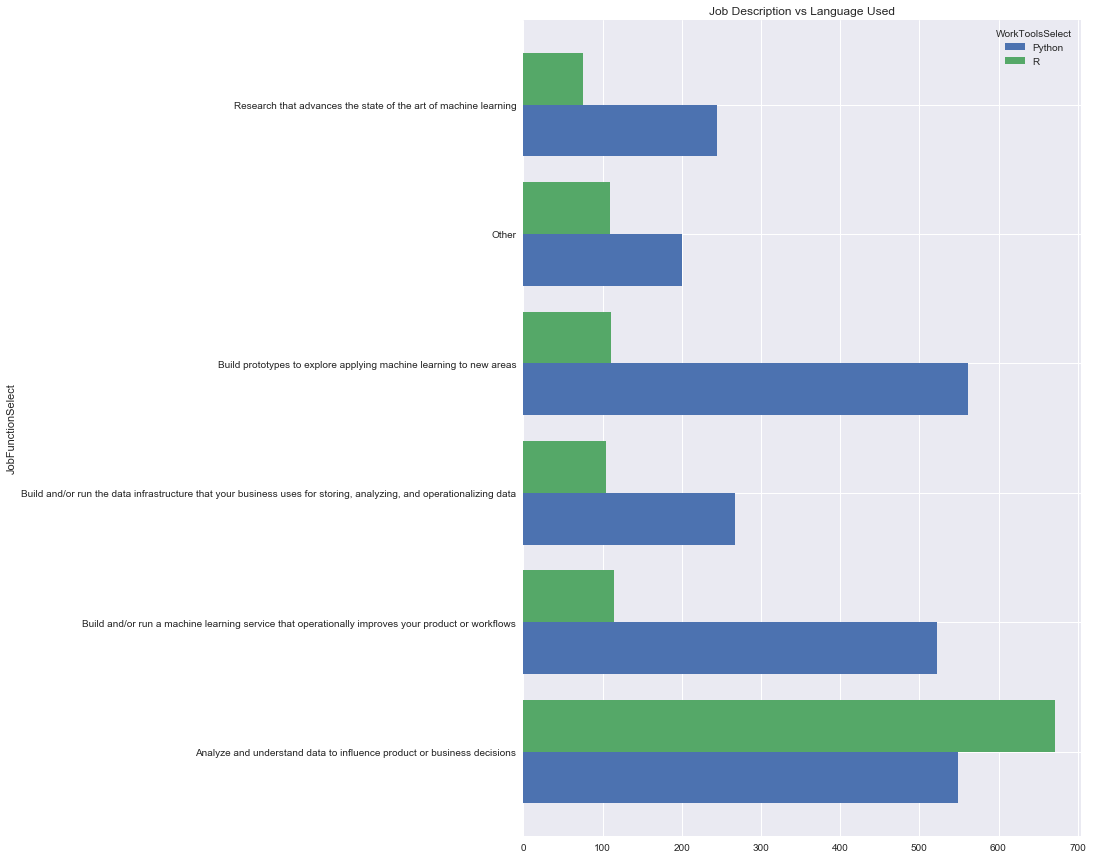

In [107]:
r_vs_py2=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py2.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Description vs Language Used')
plt.show()

As I had already mentioned R excels in analytics, but Python beats in Machine Learning. The graph shows that R has influence when it comes to pure analytics, but other ways python wins.

### Tenure vs Language Used

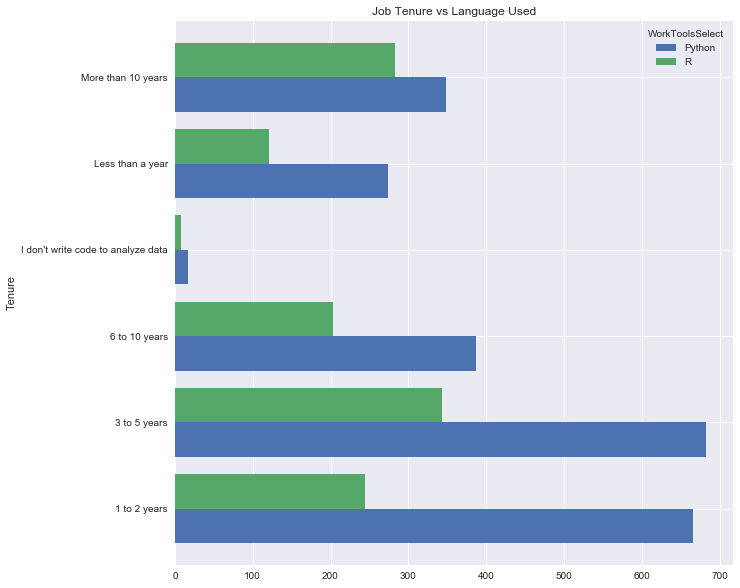

In [108]:
r_vs_py3=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py3.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

As we had seen earlier, Python is highly recommended for beginners. Thus the proportion of Python users is more in the initial years of coding. The gap between the languages however reduces over the years, as the coding experience increases.

### Industry vs Language Used

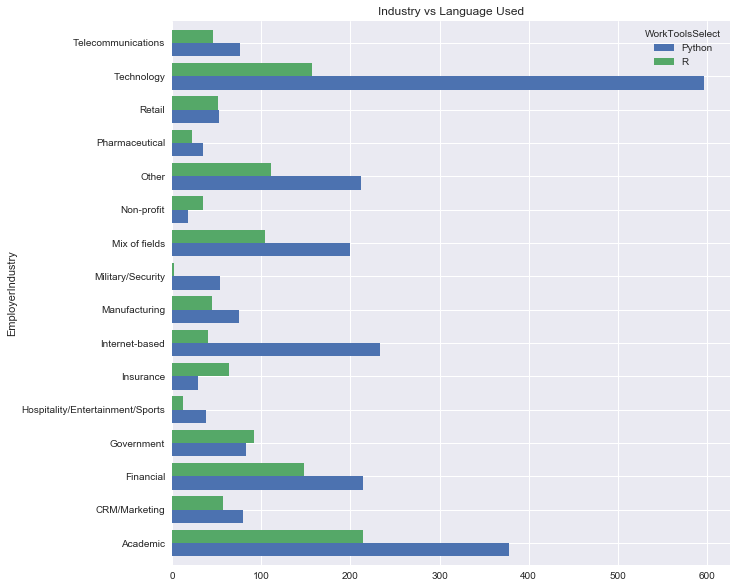

In [109]:
r_vs_py4=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py4.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

R beats Python in Government, Insurance and Non-Profits industries. Similarly, Python beats R with a very big margin in Technology and Military industry. In remaining other industries, the share of Python looks to be roughly 15-20% more than that of R.

### Common Tools with Python and R

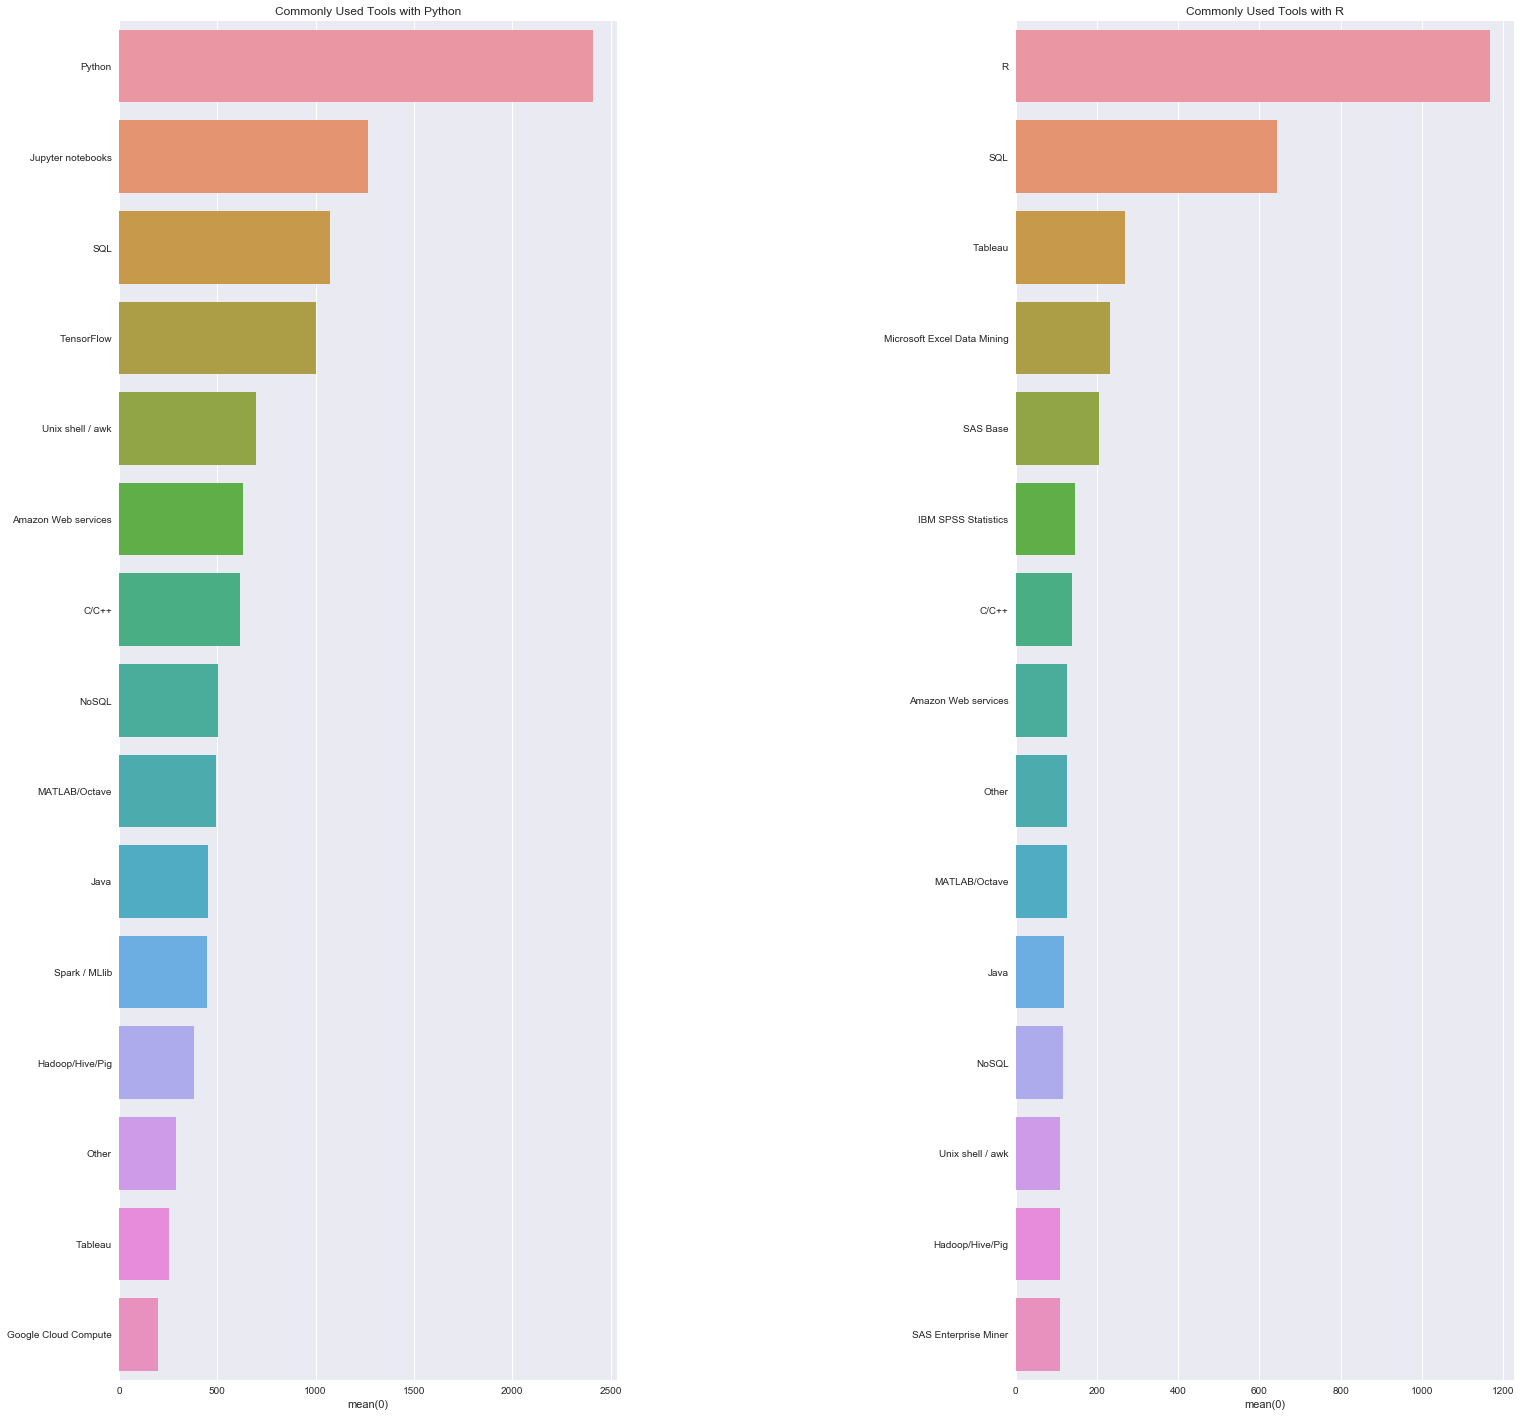

SQL seems to be the most common complementory tool used with both the languages. SQL is the primary language for querying large databases, thus knowing it well is a very big plus.

### Asking the Data Scientists

If I successfully write a Hello World program, then does that make me programmer or a developer?? If I beat my friends in a race, then does that make me the fastest person on the earth?? The answer is pretty obviously NO. This is the problem with the emerging Computer Science and IT folks. Based on their limited skills and experience, they start considering themselves much more than they really are. Many of them start calling them Machine Learning Practitioners even if they haven't really worked on real life projects and have just worked on some simple datasets. Similarly many responses here must be a bluff response. Lets check how many of them are the real Data Science practitioners.

In [111]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

So about 26% of the total respondents consider themselves as Data Scientist. What does Sort of mean?? Are they still learning or are they unemployed. For now lets consider them as a No.

### Current Job Titles

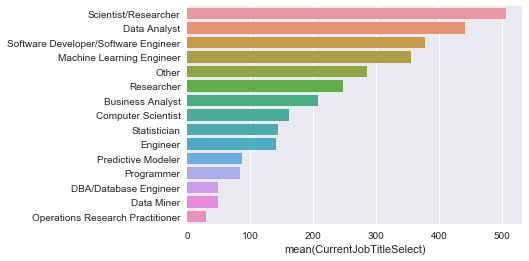

In [112]:
scientist=response[response['DataScienceIdentitySelect']=='Yes']
x1=scientist.CurrentJobTitleSelect.value_counts().to_frame()
sns.barplot(x1.CurrentJobTitleSelect, x1.index)


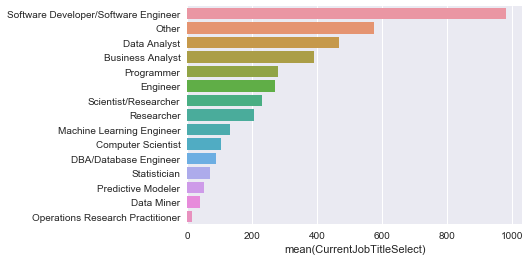

In [113]:
scientist1=response[response['DataScienceIdentitySelect']=='No']
x1=scientist1.CurrentJobTitleSelect.value_counts().to_frame()
sns.barplot(x1.CurrentJobTitleSelect, x1.index)

Surprisingly there is no entry for the Job Title Data Scientist. There reasons for this could be that the people with CurrentJobTitleSelect as Data Scientist(who might be working as Data Scientist) might have not answered the question: "Do you currently consider yourself a Data Scientist?"

There are many overlapping and common skills between the jobs like Data Analyst,Data Scientist and Machine Learning experts, Statisticians,etc. Thus they too have similar skills and consider themselves as Data Scientists even though they are not labeled the same. Now lets check if the previous assumption was True.


In [115]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist']
true.shape

(2433, 228)

It was indeed True. People with their CurrentJobTitle as Data Scientist did not answer the question "Do you currently consider yourself a Data Scientist?". So I am considering them also to be real Data Scientists.

In [117]:
scientist=pd.concat([scientist,true])
scientist['CurrentJobTitleSelect'].shape[0]

6690L

So out of the total respondents, about 40% of them are Data Scientists or have skills for the same.

### Country-Wise Split

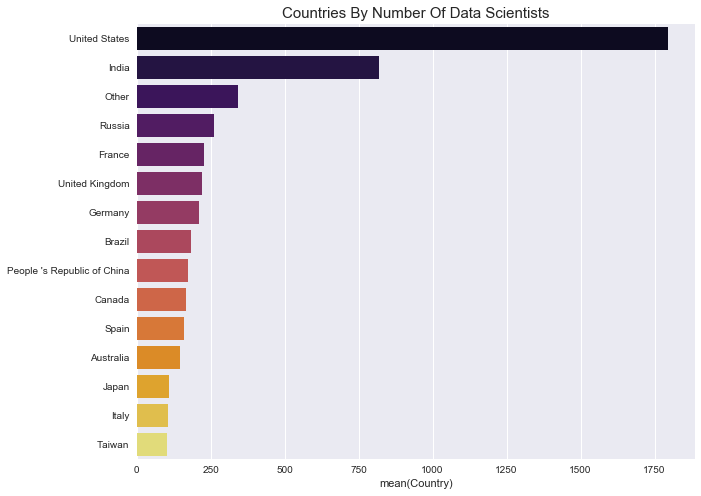

In [119]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

The graph is similar to the demographic graph where we had shown number of users by country. The difference is that the numbers have reduced as we have only considered Data Scientists.

### Employment Status & Education

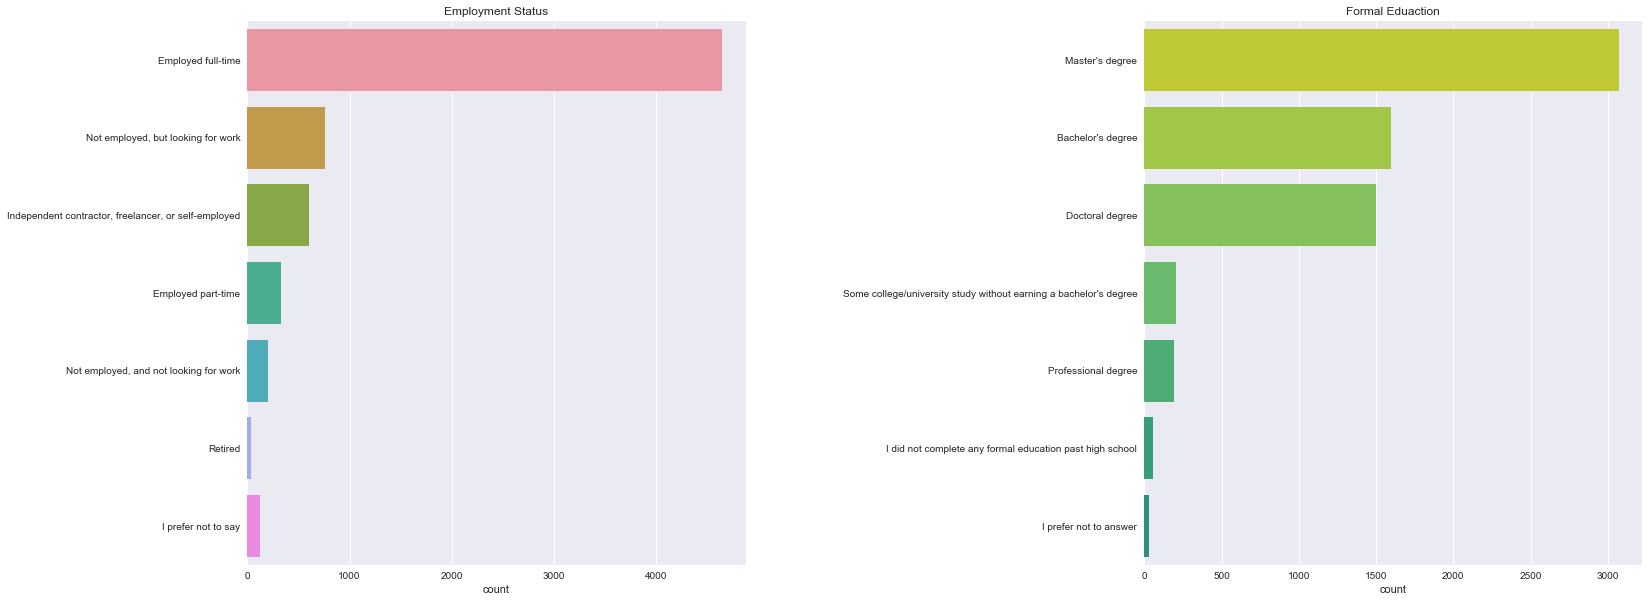

In [121]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1],palette=sns.color_palette('viridis_r',15))
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

About 67% of the data scientists are employed full-time, while about 11-12% of them are unemployed but looking for job. On the education side it is evident that about 45-46% of the data scientists hold a master's degree, while about 23-24% of them have a bachelor's degree or a doctoral degree. Thus education seems to be an important factor for becoming a data scientist. Let's see how does the salary vary according to the education.

### Compensation By Formal Education

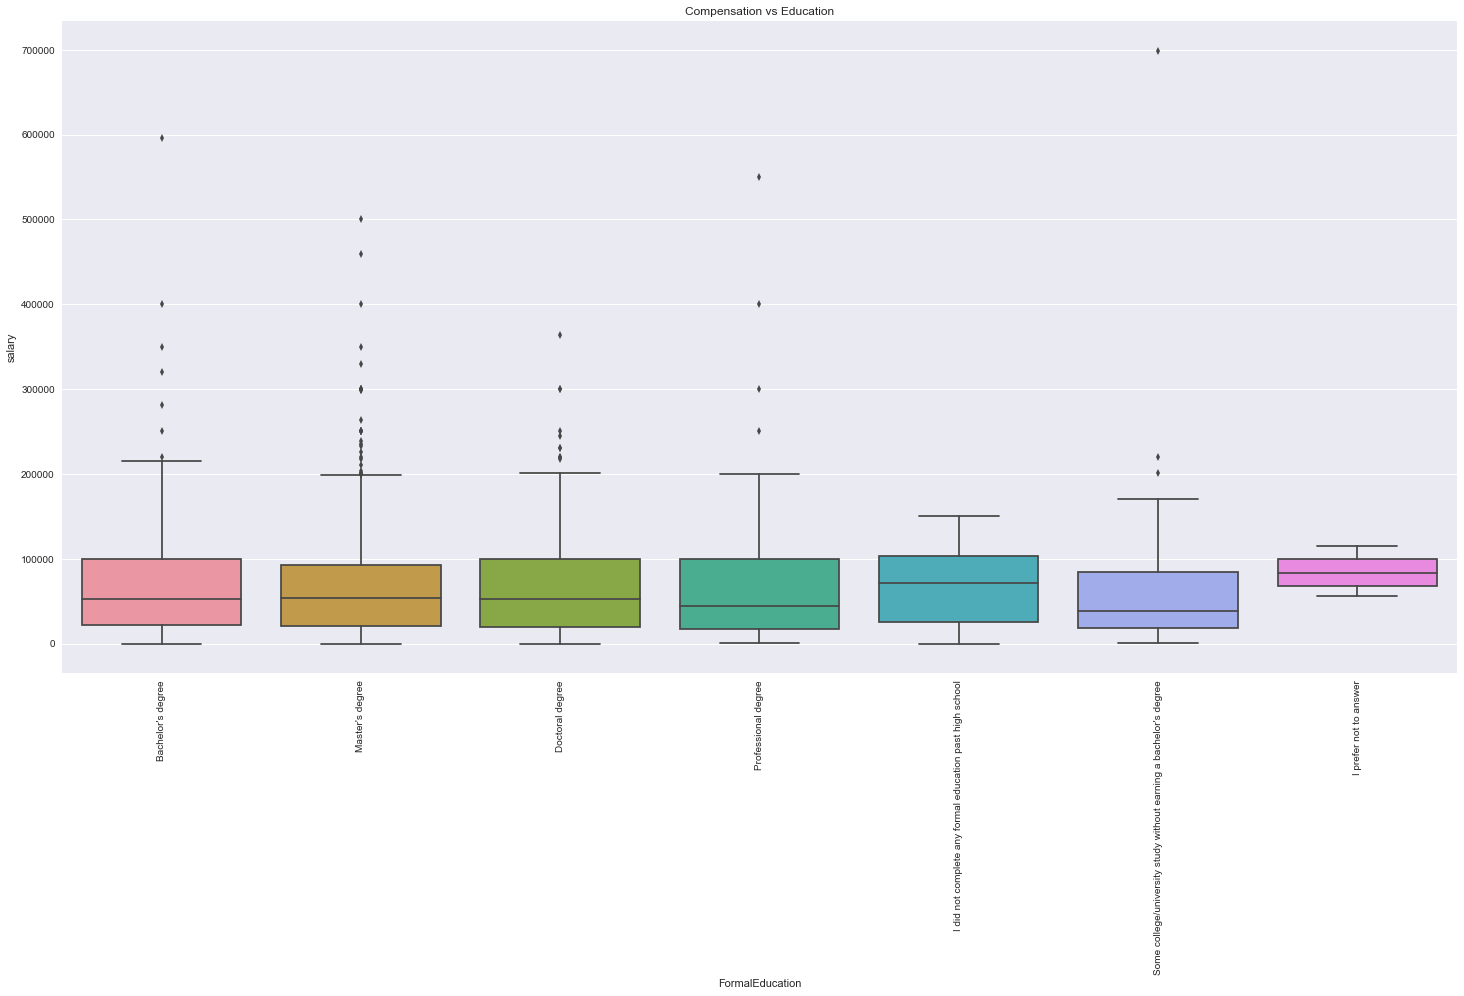

In [123]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
comp_edu=comp_edu[['FormalEducation','salary']]
sns.boxplot(x='FormalEducation',y='salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

This is surprising as the salary ranges for Bachelor's, Master's and Doctoral degree look to very similar. The median for Bachelor's degree seems to be a bit high as compared to Master's and doctoral degree. I didn't expect this as many of the Data Scientists hold a masters degree. But I think Work Experience matters more than any degree. Maybe the Bachelor's degree holders have more experience as compared than the other two.

### Previous Job and Salary Change

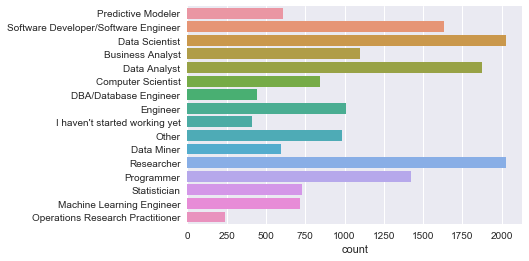

In [134]:
job=scientist.PastJobTitlesSelect.str.split(",").dropna()
past_job=[]
for i in job.str:
    past_job.extend(i)
sns.countplot(y=pd.Series(past_job).index, data=pd.Series(past_job))
plt.title("Previous Job")


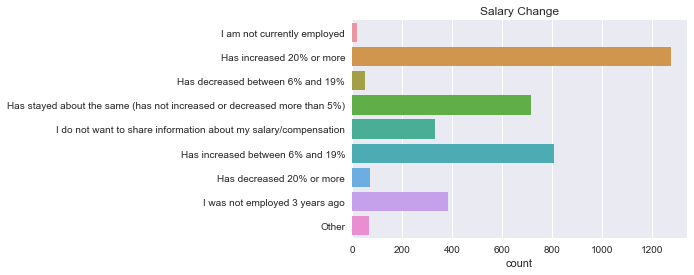

In [136]:
job=scientist.SalaryChange.str.split(",").dropna()
past_job=[]
for i in job.str:
    past_job.extend(i)
sns.countplot(y=pd.Series(past_job).index, data=pd.Series(past_job))
plt.title("Salary Change")

Clearly majority of people switching to Data Science get a salary hike about 6-20% or more. With this increasing demand for Data Scientists, the salary may also increase with time.

### Tools used at Work

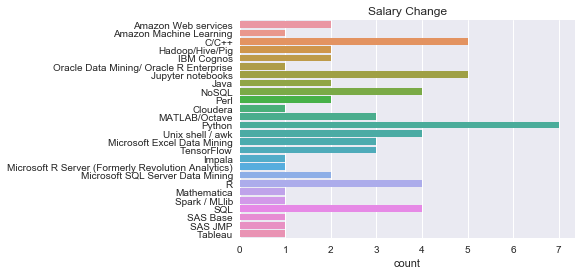

In [138]:
job=scientist.WorkToolsSelect.str.split(",")[:15].dropna()
past_job=[]
for i in job.str:
    past_job.extend(i)
sns.countplot(y=pd.Series(past_job).index, data=pd.Series(past_job))
plt.title("Salary Change")

Similar observations, Python, R and SQL are the most used tools or languages in Data Science

### Where Did they Learn From??

In [146]:
scientist.CoursePlatformSelect.value_counts().dropna()

Coursera                               169
Coursera,Udacity                        64
Coursera,edX                            43
Other                                   39
Coursera,edX,Udacity                    37
Coursera,DataCamp                       33
Coursera,DataCamp,edX,Udacity           31
Udacity                                 26
DataCamp                                24
Coursera,DataCamp,edX                   20
Coursera,DataCamp,Udacity               19
edX                                     19
Coursera,Other                          19
Coursera,Udacity,Other                   8
DataCamp,Other                           8
DataCamp,edX                             6
DataCamp,Udacity                         6
Coursera,edX,Other                       5
Coursera,DataCamp,edX,Other              4
Coursera,DataCamp,edX,Udacity,Other      4
Coursera,DataCamp,Udacity,Other          3
Coursera,DataCamp,Other                  3
Coursera,edX,Udacity,Other               2
Udacity,Oth

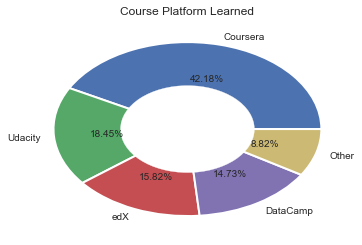

In [169]:
job=scientist.CoursePlatformSelect.str.split(",").dropna()
past_job=[]
for i in job.str:
    past_job.extend(i)
X=pd.Series(past_job).dropna().value_counts().to_frame()

X[0].plot.pie(autopct="%.2f%%",wedgeprops={'linewidth':2, 'edgecolor':'white'})
c1=plt.Circle((0,0),.5, color='white')

p=plt.gcf()
p.gca().add_artist(c1)
plt.ylabel("")
plt.title("Course Platform Learned")




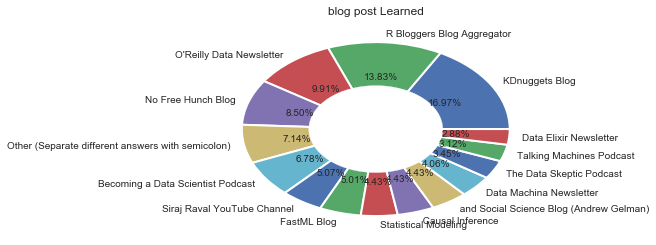

In [171]:
job=scientist.BlogsPodcastsNewslettersSelect.str.split(",").dropna()
past_job=[]
for i in job.str:
    past_job.extend(i)
X=pd.Series(past_job).dropna().value_counts()[:15].to_frame()

X[0].plot.pie(autopct="%.2f%%",wedgeprops={'linewidth':2, 'edgecolor':'white'})
c1=plt.Circle((0,0),.5, color='white')

p=plt.gcf()
p.gca().add_artist(c1)
plt.ylabel("")
plt.title("blog post Learned")

Coursera is the most favoured platform by Data Scientists for learning Data Science. My personal vote also goes for Coursera, where you can learn things from scratch to advanced on the same platform. It is not limited to a single language like Python or R, but also has courses covering other languages like Scala,etc. Similarly KDNuggets is the most preferred blog.

### Time Spent on Tasks
A Data Scientist is not always building predictive models, he is also responsible for the data quality, gathering the right data, analytics,etc. Lets see how much time a data scientist spends on these differnt tasks.



AttributeError: 'module' object has no attribute 'zip_longest'

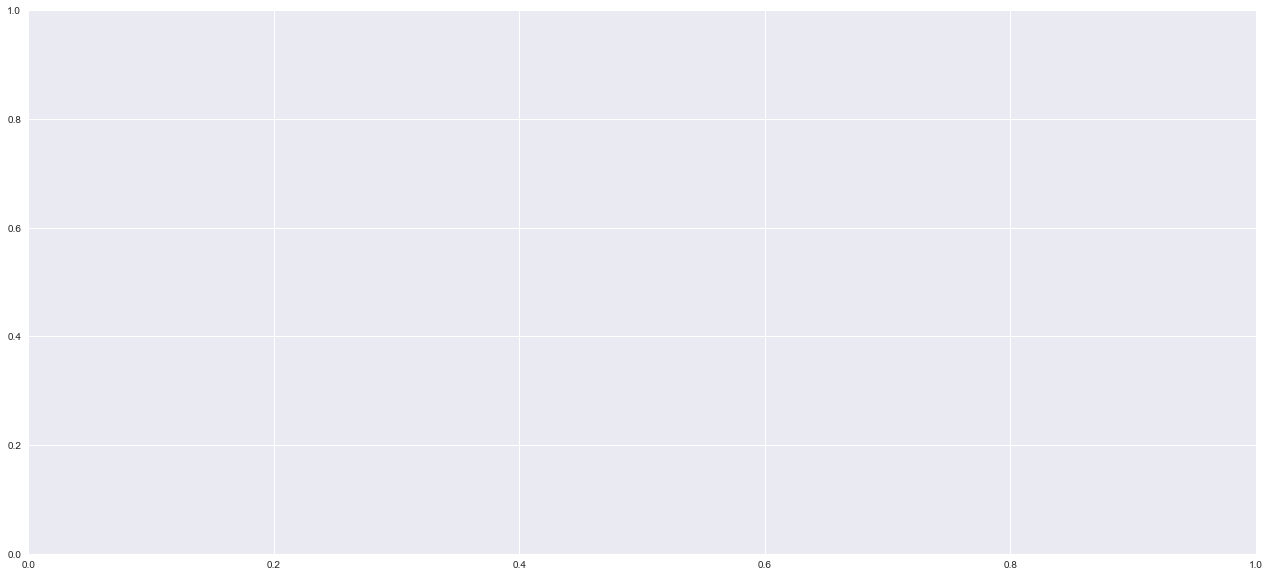

In [177]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent, range(length)):
    plt.subplot((length/2),2,j+1)
    scientist[i].hist(bins=10, edgecolor='black')
plt.show()

The read line is the mean line. Lets do it stepwise:

TimeGatheringData: It is undoubtedly the most time consuming part. Getting the data is the most painstaking task in the entire process, which is followed by Data Cleaning(not shown as data not available) which is yet other time consuming process. Thus gathering right data and scrubing the data are the most time consuming process.

TimeVisualizing: It is probably the least time consuming process(and probably the most enjoyable one..:p), and it reduces even further if we use Enterprise Tools like Tableau,Qlik,Tibco,etc, which helps in building graphs and dashboards with simple drag and drop features.

TimeFindingInsights: It is followed after visualising the data, which involves finding facts and patterns in the data, slicing and dicing it to find insights for business processes.It looks to a bit more time consuming as compared to TimeVisualizing.

TimeModelBuilding: It is where the data scientists build predictive models, tune these models,etc. It is the 2nd most time consuming process after TimeDataGathering.

### Cloud Services
With the increasing size of the data, it is not possible to process the data and perform predictive analytics on the physical server infrastructures. Cloud thus takes predictive analytics to a next level, with scalabilty its main advantage. They manage service that enables you to easily build machine learning models that work on any type of data, of any size. Lets check what are the most used cloud platforms by Data Scientists


AttributeError: 'module' object has no attribute 'zip_longest'

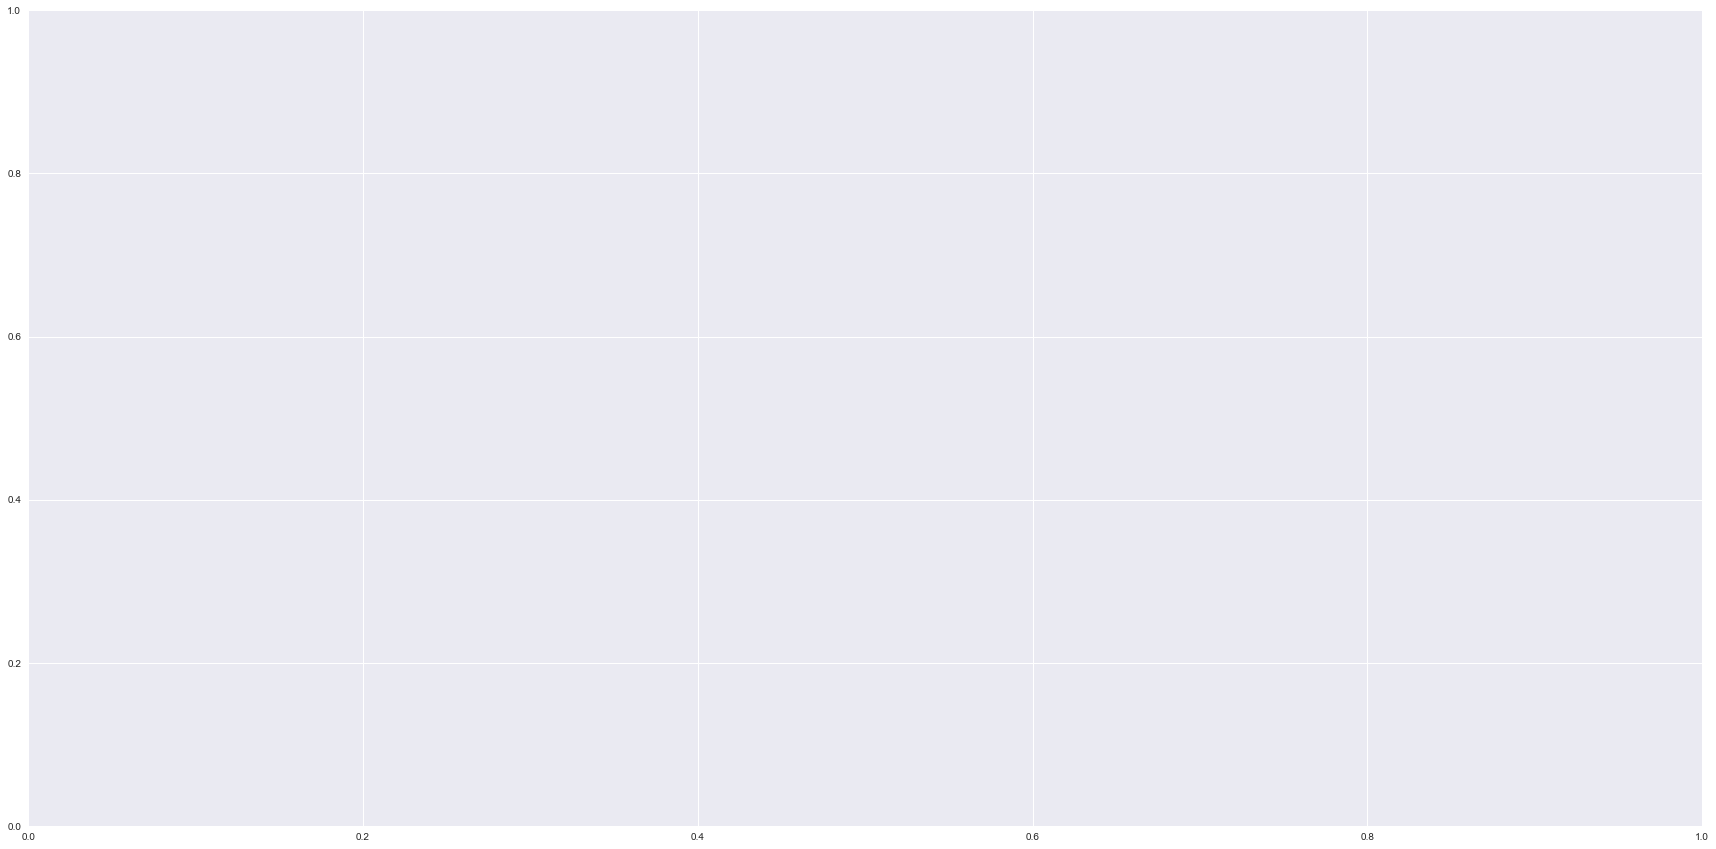

In [178]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,15))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

it is evident that AmazonAWS, which is a public cloud service provider is the most used cloud platform, followed by Hadoop. Hadoop is an open-source software framework used for distributed storage and processing of dataset of big data. 
### importance Of Visualisations

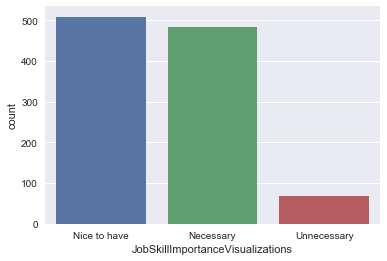

In [183]:
scientist.JobSkillImportanceVisualizations.value_counts().dropna()
sns.countplot(scientist.JobSkillImportanceVisualizations)

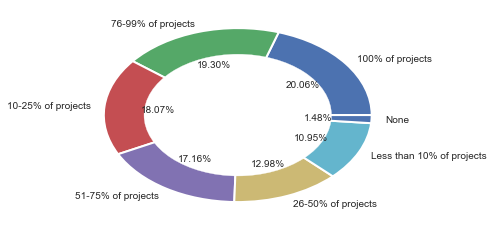

In [191]:
scientist.WorkDataVisualizations.value_counts().dropna().plot.pie(autopct="%.2f%%", wedgeprops = {"linewidth":2, "edgecolor" : "white"})
my_circle=plt.Circle( (0,0), 0.7,color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Visualisations are a very integral part of Data Science Projects, and the above graph also shows the same. Almost all data science projects i.e 99% of the projects have visualisations in them, doesn't matter how big or small. About 95% of Data Scientists say that Visualisations skills are nice to have or necessary.Visuals help to understand and comprehend the data faster not only to the professionals but also to target customers, who may not be technically skilled.

### BI Tools
Business intelligence software is a type of application software designed to retrieve, analyze, transform and report data for business intelligence. They make data visualisation and analytics very simple as compared to normal coding way in Python or R. The only drawback is that they are proprietory and costly. Lets check which are the most frequently used enterprise BI tools used by Data Scientists.

In [ ]:
BI=['WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel']
plt.subplots(figsize=(30,25))
length=len(BI)
for i,j in itertools.zip_longest(BI,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

I had read or heard somewhere that Excel is the bread and butter for analysts. This thing still somewhat holds true, as Excel is still popular among Data Scientists. However, the most frequently used BI tool looks to be Tableau. I personally use Tableau and it is pretty user friendly, drag and drop and you have your graphs ready.

### Knowledge Of Algorithms (Maths and Stats)


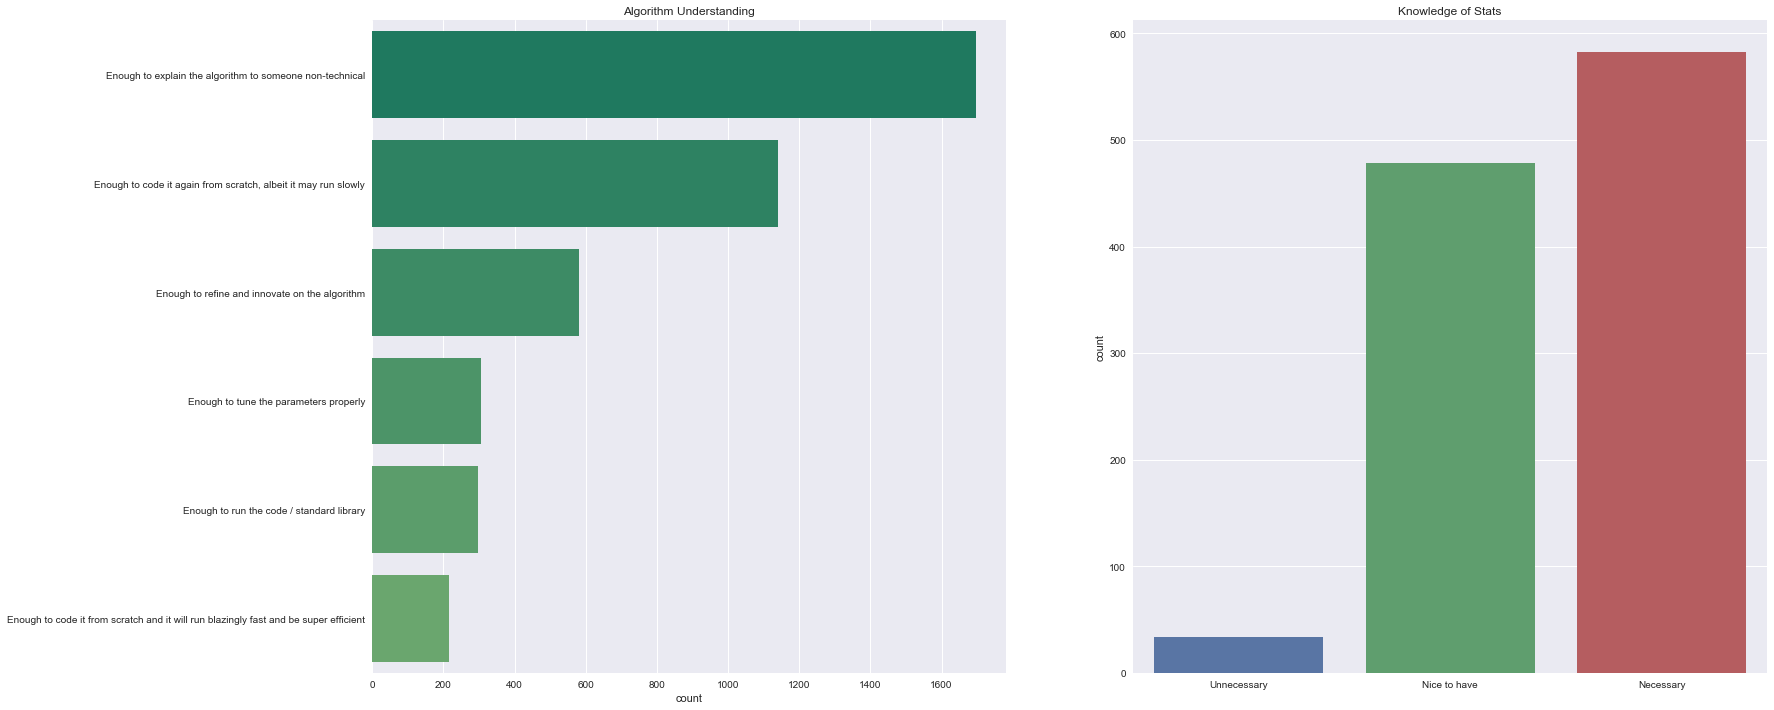

In [192]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],order=scientist['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(scientist['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

Data Scientists have a good knowledge of mathematical concepts like Statistics and Linear Algebra, which are the most important part of Machine Learning algorithms. But is this maths really required, as many standard libraries like scikit,tensorflow,keras etc have all these things already implemented. But the experienced data scientists say that we should have a good understanding of the maths behind the algorithms. About 95% of the data scientists say the stats is an important asset in Data Science.

### Learning Platform Usefullness

In [ ]:
plt.subplots(figsize=(25,35))
useful=['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege','LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessYouTube']
length=len(useful)
for i,j in itertools.zip_longest(useful,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    scientist[i].value_counts().plot.pie(autopct='%1.1f%%',colors=['g','lightblue','r'],wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
    plt.title(i,size=25)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

The above donut charts shows the opinion of Data Scientists about the various platforms to learn Data Science. The plot looks best for Projects,where the percentage for not useful is almost 0%.According to my personal opinion too, projects are the best platform or way for learning anything in the IT industry. The other excellent platforms are Online Courses and Kaggle. The graphs for other platforms are quite similar to each other.

### What should the Resume have??

In [194]:
scientist.ProveKnowledgeSelect.value_counts().dropna()

Experience from work in a company related to ML    355
Kaggle Competitions                                238
Master's degree                                    164
Github Portfolio                                   130
Online Courses and Certifications                  130
PhD                                                 86
Other                                               37
Name: ProveKnowledgeSelect, dtype: int64

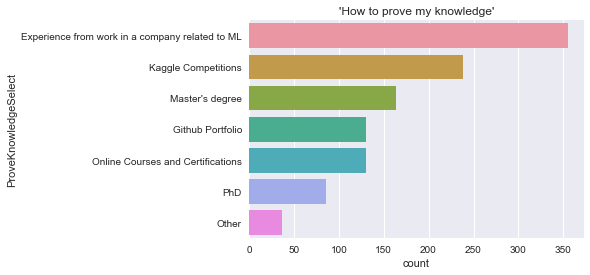

In [202]:
sns.countplot(y=scientist.ProveKnowledgeSelect, order=scientist.ProveKnowledgeSelect.value_counts().index)
plt.title("'How to prove my knowledge'")

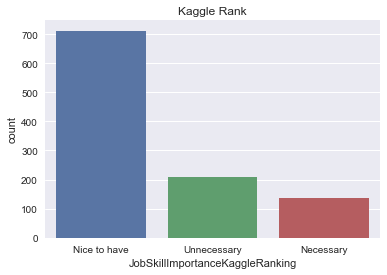

In [204]:
sns.countplot(scientist.JobSkillImportanceKaggleRanking)
plt.title("Kaggle Rank")

It is evident that Work experience in ML projects and Kaggle competitions reflects the knowledge of Data Science. Also a kaggle rank can be a good thing in one's resume. As I had mentioned earlier that relevant work experience might have a higher value as compared to any Master's or Doctoral degree. This statement thus holds good, as Data Scientists prefer work experience over degree, as seen in the above graph

### How did they search for Jobs??

In [206]:
scientist.EmployerSearchMethod.value_counts().dropna()

A friend, family member, or former colleague told me                            1080
I was contacted directly by someone at the company (e.g. internal recruiter)     894
A general-purpose job board                                                      506
Some other way                                                                   451
An external recruiter or headhunter                                              418
I visited the company's Web site and found a job listing there                   382
A career fair or on-campus recruiting event                                      314
A tech-specific job board                                                        206
Name: EmployerSearchMethod, dtype: int64

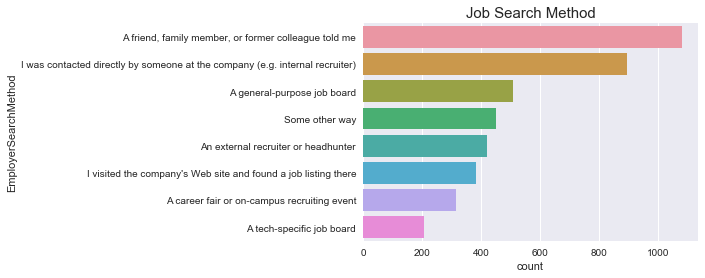

In [215]:
sns.countplot(y=scientist.EmployerSearchMethod, order = scientist.EmployerSearchMethod.value_counts().index)
plt.title('Job Search Method',size=15)

Many Data Scientists get to know about the jobs through their friends or relatives or they were contacted by directly by the company. Thus we should properly maintain our professional profiles like Linkedin and keep on updating it, as such networking sites could help you get your dream job.

### Checking the Free Responses
This file contains the free form responses answered by the respondents. The problem with this one is that being a free form response, every user will answer in their own way. What I mean is we will have different answers for the same thing. An example of this that I observed is the library Pandas is written as pandas, Pandas, panda and in many such differnt forms. Thus I will try to analyse this file using nltk(Natural Language Toolkit).

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
free=pd.read_csv('../input/freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

### Motivation Behind Working on Kaggle

In [ ]:
motivation=free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate=[]
for i in motivation:
    motivate.extend(i)
motivate=pd.Series(motivate)
motivate=([i for i in motivate.str.lower() if i not in stop_words])
f1=open("kaggle.png", "wb")
f1.write(codecs.decode(kaggle,'base64'))
f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1, 
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

### Lets flex our data science strength...:p
The wordcloud shows the motivation of users for working on kaggle. Clearly Learning Data Science, Machine Learning, interest in the same,curiosity, fun and datasets retrieval are some of the relevant ones.

### Most Frequently Used Libraries

In [ ]:
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']
f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('viridis',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('viridis',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

### Some brief information about the libraries:

## Python:
1) Sklearn- For Machine Learning algorithms. This library has almost all the important machine learning algorithms used for industries.

2) Pandas, Matlotlib & Seaborn- Mostly used together for analytics and visualisation work.

3) TensorFlow and Keras- Used for Deep Learning.

4) Numpy and Scipy- Used for scientific computations.

5) nltk- Used for Natural Language Processing.

## R:
1) dplyr- dplyr is the package for fast data manipulation.

2) ggplot2 and shiny- R's famous package for making beautiful graphics. Python visuals are nowhere near to the quality of visuals created using this library.

3) caret and randomforest- For Machine Learning purpose.

4) tidyr- Tools for changing the layout of your data sets.

5) stringr- Easy to learn tools for regular expressions and character strings.


### Conclusions
Some brief insights that we gathered from the notebook:

1) Majority of the respondents are from USA followed by India. USA also had the maximum number of data scientists followed by India. Also the median Salary is highest in USA.

2) Majority of the respondents are in the age bracket 20-35, which shows that data science is quite famous in the youngsters.

3) The respondents are not just limited to Computer Science major, but also from majors like Statistics, health sciences,etc showing that Data Science is an interdisciplinary domain.

4) Majority of the respondents are fully employed.

5) Kaggle, Online Courses(Coursera,eDx,etc), Projects and Blogs(KDNuggets,AnalyticsVidya,etc) are the top resources/platforms for learning Data Science.

6) Kaggle has the highest share for data acquisition whereas Github has the highest share for code sharing.

7) Data Scientists have the highest Job Satisfaction level and the second highest median salary (after Operations Research Analyst). On the contrary, Programmers have the least Job Satisfaction level and one of the least median salary also.

8) Data Scientists also get a hike of about 6-20% from their previous jobs.

### Tips For Budding Data Scientists
1) Learn Python,R and SQL as they are the most used languages by the Data Scientists. Python and R will help in analytics and predictive modeling while SQL is best for querying the databases.

2) Learn Machine Learning Techniques like Logistic Regression, Decision Trees, Support Vector Machines, etc as they are most commonly used Machine Learning techniques/algorithms.

3) Deep Learning and Neural Nets will be the most sought after techniques in the future, thus a good knowledge in them will be very helpful.

4) Develop skills for Gathering Data and Cleaning The Data as they are the most time consuming processes in the workflow of a data scientist.

5) Visualisations are very important in Data Science projects and almost all projects require Visualisations for understanding the data better. So one should learn Data Visualisation as Data Scientists consider it to be a necessary or nice to have skill.

6) Maths and Stats are very important in Data Science, so we should have good understanding of it for actually understanding how the algorithm works.

7) Projects are the best way to learn Data Science according to Data Scientists.So working on projects will help you learn data science better.

8) Experience with ML Projects in company and Kaggle Competitions are the best ways to show your working knowledge in Data Science. Working on ML projects in a company gives the experience of working with real world datasets, thereby enhancing the knowledge. Kaggle competitions are also a great medium, as you will be competing with Data Scientists over the world. Also a Kaggle Rank can be a good USP in the resume.

So I would like my conclude my analysis here.